# 1. Drive Mount and Install Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 경로로 이동
%cd /content/drive/MyDrive/papers

/content/drive/.shortcut-targets-by-id/1nLQ_XwyMisgxw0CYBg1KOiiFqRsYSQgX/papers


In [5]:
# installall.py는 인스톨 및 임포트 라이브러리를 미리 실행시키도록 제작하였습니다.
# 이 코드 실행 후 keras install을 하였으므로 런타임 재시작하셔야 합니다!
%run pyfile/import_everything.py
installall()
(np, pd, BeautifulSoup, SentenceTransformer, PCA, TruncatedSVD, sm, core, re, json, sns, plt, warnings,
            TfidfVectorizer, torch, ElectraModel, BertModel, BertTokenizer, AutoTokenizer, AutoModel,
            go, px, make_subplots, statistics, class_weight, Sequential, Model, load_model, LSTM, RepeatVector, TimeDistributed, Conv1D,
            MaxPooling1D, Flatten, Dense, Dropout, Input, Lambda,
            train_test_split, GridSearchCV, classification_report, confusion_matrix, accuracy_score, f1_score, make_scorer, roc_curve, roc_auc_score,
            ModelCheckpoint, Callback, K, regularizers, mode, tqdm, redirect_stdout, os, KerasClassifier) = load_libraries()

Installing emoji...
emoji has been installed.
Installing sentence_transformers...
sentence_transformers has been installed.
transformers is already installed.
Installing pyod...
pyod has been installed.
Installing Keras version 2.12.0...
Keras version 2.12.0 has been installed.


<IPython.core.display.Javascript object>

Doing Import np...
Doing Import pandas...
Doing Import bs4...
Doing Import sentence_transformers...
Doing Import sklearn.decomposition...
Doing Import sm...
Doing Import emoji...
Doing Import re...
Doing Import json...
Doing Import seaborn...
Doing Import matplotlib.pyplot...
Doing Import warnings...
Doing Import TfidfVectorizer...
Doing Import torch...
Doing Import ElectraModel...
Doing Import BertModel...
Doing Import BertTokenizer...
Doing Import AutoTokenizer...
Doing Import AutoModel...
Doing Import go...
Doing Import px...
Doing Import make_subplots...
Doing Import statistics...
Doing Import class_weight...
Doing Import Sequential...
Doing Import Model...
Doing Import load_model...
Doing Import LSTM...
Doing Import RepeatVector...
Doing Import TimeDistributed...
Doing Import Conv1D...
Doing Import MaxPooling1D...
Doing Import Flatten...
Doing Import Dense...
Doing Import Dropout...
Doing Import Input...
Doing Import Lambda...
Doing Import train_test_split...
Doing Import GridSear

# 2. 댓글 파일 불러오기 및 텍스트 전처리

In [ ]:
# 이 아래에는 본인의 루트경로를 적는 곳입니다. 추후 통합
jss_route='/content/drive/MyDrive/papers'

> 1. 데이터셋 변경(3개의 영상에서 수집)
> 2. 텍스트 전처리된 파일


In [ ]:
df = pd.read_excel(jss_route+"/text_novelty_detection_sample_preprocessed.xlsx")
df

comment         author  \
0                              cctv가 버젓이 있는데무슨 생각으로 저랬을까          downy   
1                            35년에서 판사가 용서해줘서 형량 줄어들지 않았나              ㅇ   
2                          참고로 주먹은 자기자신보다 강한사람을 때리는것 이지요            서종범   
3                사회에 나와봐야 도움도 안됨 사형이 답 또 다른 피해자를 만들지 마소서    식물 그리고 커피한잔   
4                            잘 된 일이기는 한데 어케 조두순보다 형량이 높지        프라다임페리얼   
...                                                  ...            ...   
17542  자식이 없는걸 지구님은 바라실겁니다 인간의 번식은 가치쓸모가 없는 쓰레기라고 지구님...  E지구에 붙어사는 인간!   
17543                                       집에서 당신이 키우세요      카일라스를 꿈꾸며   
17544                          애를 소중히 한다고는 하면서 애 망치는 부모들            김준하   
17545                   부모들이 아니라 정확히 엄마들 선생 괴롭히는거 다 여자들임             ㅇㅇ   
17546                         더럽고 추잡하고 비린내나는 애낳은 인간들 학부모          kk kk   

                       date  num_likes  \
0      2023-11-03T02:10:38Z          0   
1      2023-11-02T22:06:15Z          0   
2      2023-11-02T14:04:18Z          0   
3      2023-11-02T13:02:30Z          0   
4      2023-11-02T08:31:06Z          0   
...                     ...        ...   
17542  2023-09-10T05:17:08Z          1   
17543  2023-09-10T05:15:41Z         88   
17544  2023-09-10T05:12:01Z        721   
17545  2023-09-10T07:47:14Z          8   
17546  2023-09-10T05:08:43Z          1   

                                               title  length  
0                '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      25  
1                '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      27  
2                '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      29  
3                '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      39  
4                '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      27  
...                                              ...     ...  
17542  [자막뉴스] "넌 자식이 없어서 그러냐?" 폭언하던 학부모, 결국... / YTN     203  
17543  [자막뉴스] "넌 자식이 없어서 그러냐?" 폭언하던 학부모, 결국... / YTN      12  
17544  [자막뉴스] "넌 자식이 없어서 그러냐?" 폭언하던 학부모, 결국... / YTN      25  
17545  [자막뉴스] "넌 자식이 없어서 그러냐?" 폭언하던 학부모, 결국... / YTN      32  
17546  [자막뉴스] "넌 자식이 없어서 그러냐?" 폭언하던 학부모, 결국... / YTN      26  

[17547 rows x 6 columns]

In [ ]:
# 이 아래에는 함수를 적는 곳입니다.
def remove_html_tags(text):
    if isinstance(text, str):
        soup = BeautifulSoup(text, "html.parser")
        clean_text = soup.get_text()
        return clean_text
    else:  # Non-string values (e.g., NaN, None, float)
        return text  # or return "" if you want to return an empty string

def contains_korean(text):
    if not isinstance(text, str):
        return False
    pattern = r"[ㄱ-ㅎㅏ-ㅣ가-힣]"
    return bool(re.search(pattern, text))



def corpus_preprocess(df):
    #df = df # 데이터프레임 받아옴

    df = df[~df['comment'].str.contains("@", na=False)]          # 저격 대댓글 걸러냄
    #df = df[~df['comment'].str.contains(filter_words, na=False)] # 정치, 종교 댓글 걸러내기

    # 아래의 코드에서 에러가 나므로 다음과 같이 수정하겠습니다.
    #df['CleanedText'] = df['comment'].apply(remove_html_tags)   # html 태그 제거
    #df['comment'] = df['CleanedText']
    #df = df[['comment','author', 'date', 'num_likes','title']] # 이 코드는 불필요해져 삭제
    df['comment'] = df['comment'].apply(remove_html_tags)

    df = df[df["comment"].apply(contains_korean)] # 한글 없는 텍스트 제거

    df['comment'] = df['comment'].apply(lambda x: core.replace_emoji(x, replace= "")) # 이모티콘 제거

    df['comment'] = df['comment'].apply(lambda x: ' '.join(x.split()))  # 다중 띄어쓰기 -> 단일 띄어쓰기
    df = df.reset_index(drop = True)

    df = df.drop_duplicates(["comment", "author"]) # 중복 댓글 제거
    df = df.reset_index(drop = True)

    df["length"] = df["comment"].str.len() # 길이 3 미만 -> 의미없는 댓글이므로 지움
    df = df[df["length"] > 3]

    return df

In [ ]:
df["length"] = df["comment"].str.len()
df = df[(df["length"] > 3)&(df["length"] < 500)]

In [ ]:
df = corpus_preprocess(df)
df.head()

comment       author                  date  \
0                cctv가 버젓이 있는데무슨 생각으로 저랬을까        downy  2023-11-03T02:10:38Z   
1              35년에서 판사가 용서해줘서 형량 줄어들지 않았나            ㅇ  2023-11-02T22:06:15Z   
2            참고로 주먹은 자기자신보다 강한사람을 때리는것 이지요          서종범  2023-11-02T14:04:18Z   
3  사회에 나와봐야 도움도 안됨 사형이 답 또 다른 피해자를 만들지 마소서  식물 그리고 커피한잔  2023-11-02T13:02:30Z   
4              잘 된 일이기는 한데 어케 조두순보다 형량이 높지      프라다임페리얼  2023-11-02T08:31:06Z   

   num_likes                                title  length  
0          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      25  
1          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      27  
2          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      29  
3          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      39  
4          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      27

# 3. 스팸 댓글 사전 및 라벨 만들기

In [ ]:
with open(jss_route+"/political_comments_dict.json") as f:
    filter_words = json.load(f)
print(filter_words)

예수|하나님|석열|슬롯|문재인|문재앙|이재명|윤석열|민주당|한동훈|장관|법무부|더불어민주당|허경영|전라도|대깨문|좌파|우파|극우|극좌|이준석|정치|국회의원|선전|선동|사상|검찰|대통령|천공|건희|국민의힘|국힘|운동권|탄핵|정권교체|좌좀|이념|일베|클리앙|남팍|홍어|노무현|김대중|땅끄|전두환|국회|국개|의원|오세훈|검새|완박|새누리|박근혜|우병우|최순실|대남|국정|청문회|박정희|이승만|야당|여당|민노총|최강욱|추미애|윤버버|황교안|간첩|안철수|윤통|자유한국당|미래통합당|보수|진보|검수완박|법조|공직|1찍|2찍|김동연|윤두창|박형준|이명박|대선|총선|정치병|정권|장관|유승민


In [ ]:
df['class'] = df['comment'].apply(lambda x: 1 if re.search(filter_words, x) else 0)
df.head()

comment       author                  date  \
0                cctv가 버젓이 있는데무슨 생각으로 저랬을까        downy  2023-11-03T02:10:38Z   
1              35년에서 판사가 용서해줘서 형량 줄어들지 않았나            ㅇ  2023-11-02T22:06:15Z   
2            참고로 주먹은 자기자신보다 강한사람을 때리는것 이지요          서종범  2023-11-02T14:04:18Z   
3  사회에 나와봐야 도움도 안됨 사형이 답 또 다른 피해자를 만들지 마소서  식물 그리고 커피한잔  2023-11-02T13:02:30Z   
4              잘 된 일이기는 한데 어케 조두순보다 형량이 높지      프라다임페리얼  2023-11-02T08:31:06Z   

   num_likes                                title  length  class  
0          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      25      0  
1          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      27      0  
2          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      29      0  
3          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      39      0  
4          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]      27      0

In [ ]:
df[df["class"]==1].head() # 5개만 추출

comment    author  \
28   폭력으로 징역 12년 심하지 않냐 더한 정치 범과 경제사범들이 있는데 있는자들에게는...       은김오   
191        이런놈이 더큰소리치는이유국회에 전과자놈들이 많기때문국회 전과자 색출 시급합니다  pil7 any   
247                이런 악질범도 사형 선고를 내리면 문재인은 정말 싫어 할 겁니다        이슬   
341                                     국개들 일하자 법좀 바꾸자      비타민D   
413                                     이재명도 이렇게 해야하는데       김명분   

                     date  num_likes                                title  \
28   2023-10-31T08:36:45Z          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]   
191  2023-10-17T21:19:48Z          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]   
247  2023-10-13T06:52:09Z          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]   
341  2023-10-02T13:26:13Z          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]   
413  2023-09-28T13:58:12Z          0  '부산 서면 돌려차기 사건' 드디어 밝혀진 진실 [shorts]   

     length  class  
28       71      1  
191      43      1  
247      35      1  
341      14      1  
413      14      1

In [ ]:
df["class"].value_counts()
# 라벨 만들어봄 -> 상당히 불균형함

0    17129
1      418
Name: class, dtype: int64

# 4. Using Sentence Transformer (kor)

> 1.   Transformer로 임베딩 시도(1000->2000개의 sample)
> 2.   EDA 시도

> Kcelectra 완료  
> Kcbert 완료  
> TfidfVector 완료  


In [ ]:
# embeding 전용 함수를 따로 py로 제작하였습니다.
%run pyfile/Embedding.py

In [ ]:
df_sample = df[["comment", "class"]].sample(n=len(df)).reset_index(drop = True)
df_sample.head()

comment  class
0                           맞고 기절하고 몸빳빳하게 경직되고 존나 소름      0
1                         가해자 무조건 죽여야한다무조건죽여야한다교화불가능      0
2  아이를 저렇게키위서엇다 써 과잉보호맞네 지나쳐도 너무지나쳐요 자식소중한건 맞지만 이...      0
3                                           그냥 죽여라 좀      0
4                                저 남자는 미리 피임 준비를 했을듯      0

In [ ]:
# KcElectra 모델과 토크나이저
kc_electra_model = AutoModel.from_pretrained("beomi/KcELECTRA-base-v2022")
kc_electra_model = kc_electra_model.to("cuda")  # GPU로 이동
kc_electra_tokenizer = AutoTokenizer.from_pretrained("beomi/KcELECTRA-base-v2022")

# KcBert 모델과 토크나이저
kc_bert_model = BertModel.from_pretrained("Beomi/KcBERT-base")
kc_bert_model = kc_bert_model.to("cuda")  # GPU로 이동
kc_bert_tokenizer = BertTokenizer.from_pretrained("Beomi/KcBERT-base")

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()


(…)CTRA-base-v2022/resolve/main/config.json:   0%|          | 0.00/504 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/511M [00:00<?, ?B/s]

(…)v2022/resolve/main/tokenizer_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

(…)LECTRA-base-v2022/resolve/main/vocab.txt:   0%|          | 0.00/450k [00:00<?, ?B/s]

(…)022/resolve/main/special_tokens_map.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

(…)omi/kcbert-base/resolve/main/config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

(…)-base/resolve/main/tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

(…)beomi/kcbert-base/resolve/main/vocab.txt:   0%|          | 0.00/250k [00:00<?, ?B/s]

In [ ]:
# 임베딩 생성
kc_electra_embedding = embed_text(df_sample["comment"], kc_electra_tokenizer, kc_electra_model)
kc_bert_embedding = embed_text(df_sample["comment"], kc_bert_tokenizer, kc_bert_model)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_sample["comment"])

# 5. 변수 선택: PCA(자연어처리에 더 특화된 TruncatedSVD로 변경하였습니다.)

> 결과
> 1. KCE, KC는 정규화 진행이 필요해보여서 정규분포로 정렬 진행해보았습니다.
> 2. Vectorizer를 통해 어느정도 스케일링보정이 되긴 하지만 KCE, KC는 스케일링이 필요해보여서 진행해보았습니다.

> py파일 설명
> 1. makePCA(matrix, pca_num)에서 파라미터소개 : matrix는 임베딩벡터, pca_num은 원하시는 차원축소레벨입니다. 저는 차원축소레벨 5으로 사용중입니다.
> 2. makeclassinto(embeddings, classdf)에서 파라미터소개 : embeddings는 임베딩벡터, classdf는 기존의 데이터프레임에서 class타깃열을 의미합니다.


In [ ]:
# pca 및 가중치 설정 전용 함수를 따로 py로 제작하였습니다.
%run pyfile/pca.py

In [ ]:
# 마크다운에서 설명된 파라미터 중 pca_num과 target_df는 모두 동일하게 적용하는 제약조건이라 아래에서 수정해서 사용하시면 됩니다.
pca_num=5
target_df=df_sample["class"]

In [ ]:
# Kcelectra
kce_corpus_embeddings=makePCA(kc_electra_embedding, pca_num)
df_sembed_kce=makeclassinto(kce_corpus_embeddings, target_df)
df_sembed_kce.head()

0         1         2         3         4  class
0  6.804383 -0.298784 -0.723366 -0.944390  0.928936      0
1  7.319045 -0.755175 -0.774582 -0.339165 -1.402727      0
2  6.860518 -2.471035 -1.385733  0.241788  0.976355      0
3  7.417362  3.315679 -1.649865  0.167715 -1.691480      0
4  6.530510 -1.401694 -1.178956  0.076570 -0.350013      0

In [ ]:
# Kcbert
kc_corpus_embeddings=makePCA(kc_bert_embedding, pca_num)
df_sembed_kc=makeclassinto(kc_corpus_embeddings, target_df)
df_sembed_kc.head()

0         1         2         3         4  class
0  12.600823 -0.928079  3.072112 -0.041459 -1.566597      0
1  13.670654  7.009439  1.621273 -0.343679  2.800925      0
2  14.197011  3.222255 -1.827697  4.539099  1.067743      0
3  12.899035  6.264729 -2.604811 -4.289185 -2.935535      0
4  14.534880  0.130677  2.110666  2.565020  2.165123      0

In [ ]:
# tfidf
tfidf_corpus_embeddings=makePCA(tfidf_matrix, pca_num)
df_sembed_tfidf=makeclassinto(tfidf_corpus_embeddings, target_df)
df_sembed_tfidf.head()

0         1         2         3         4  class
0  0.001984  0.008626 -0.011867 -0.001544 -0.002281      0
1  0.001453  0.010358  0.001606 -0.007954 -0.002151      0
2  0.001604  0.008793 -0.004239 -0.001132 -0.000703      0
3  0.035634  0.305236  0.073818  0.287640 -0.017104      0
4  0.000195  0.001088 -0.001166 -0.000221 -0.000046      0

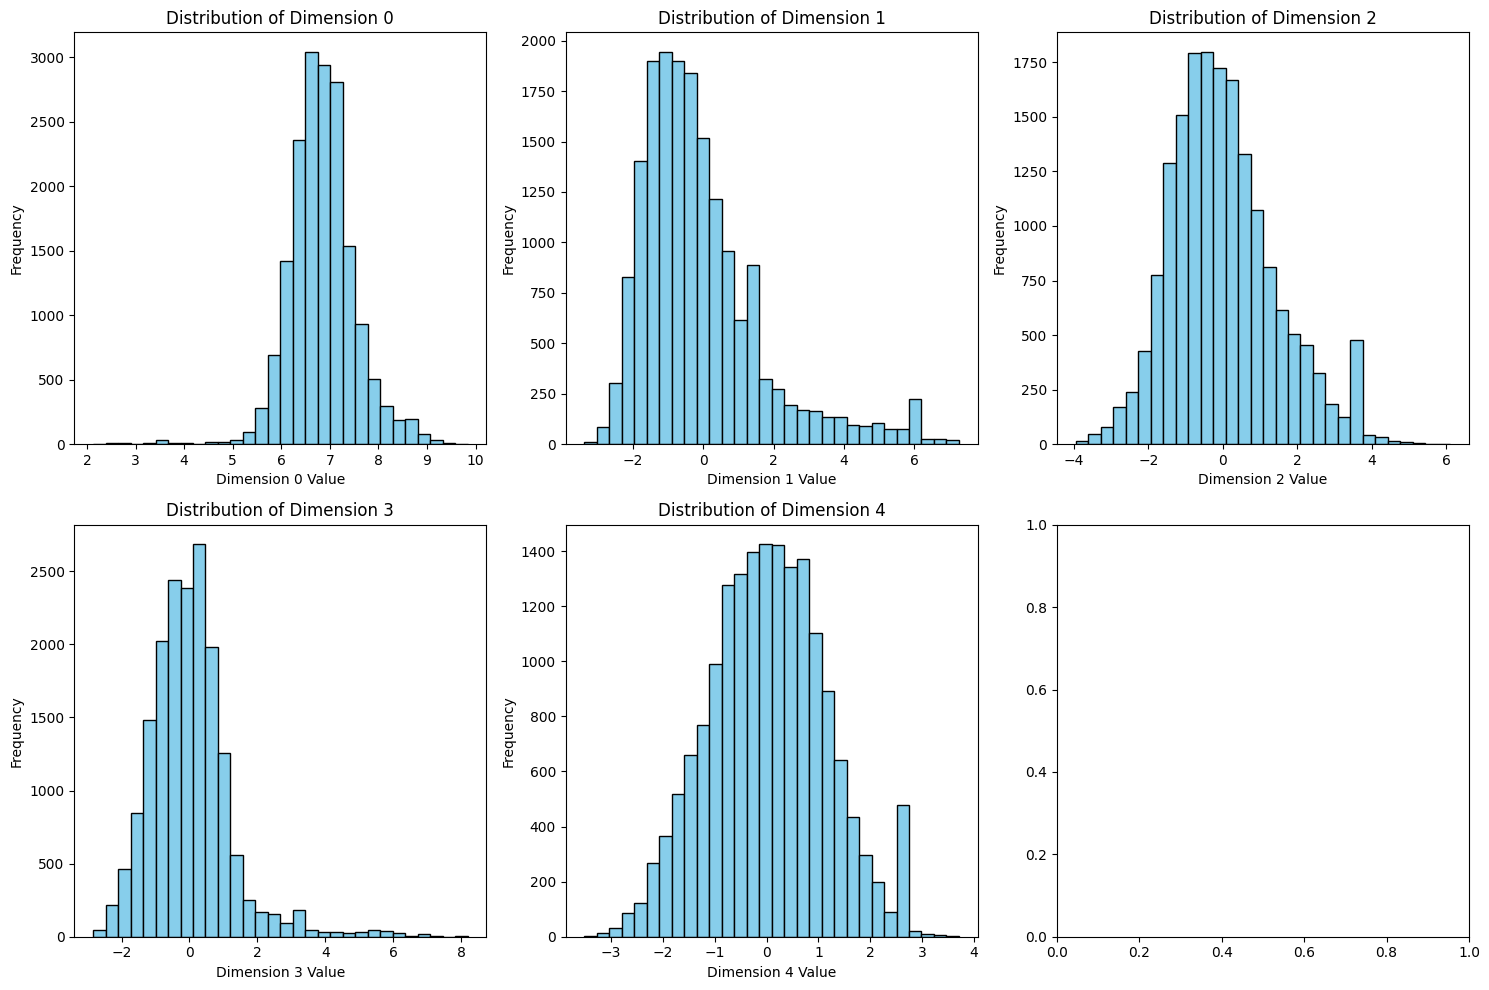

In [ ]:
# 스케일링 이전 그래프 시각화(1 : KCE)
show_dimension_graph(df_sembed_kce)

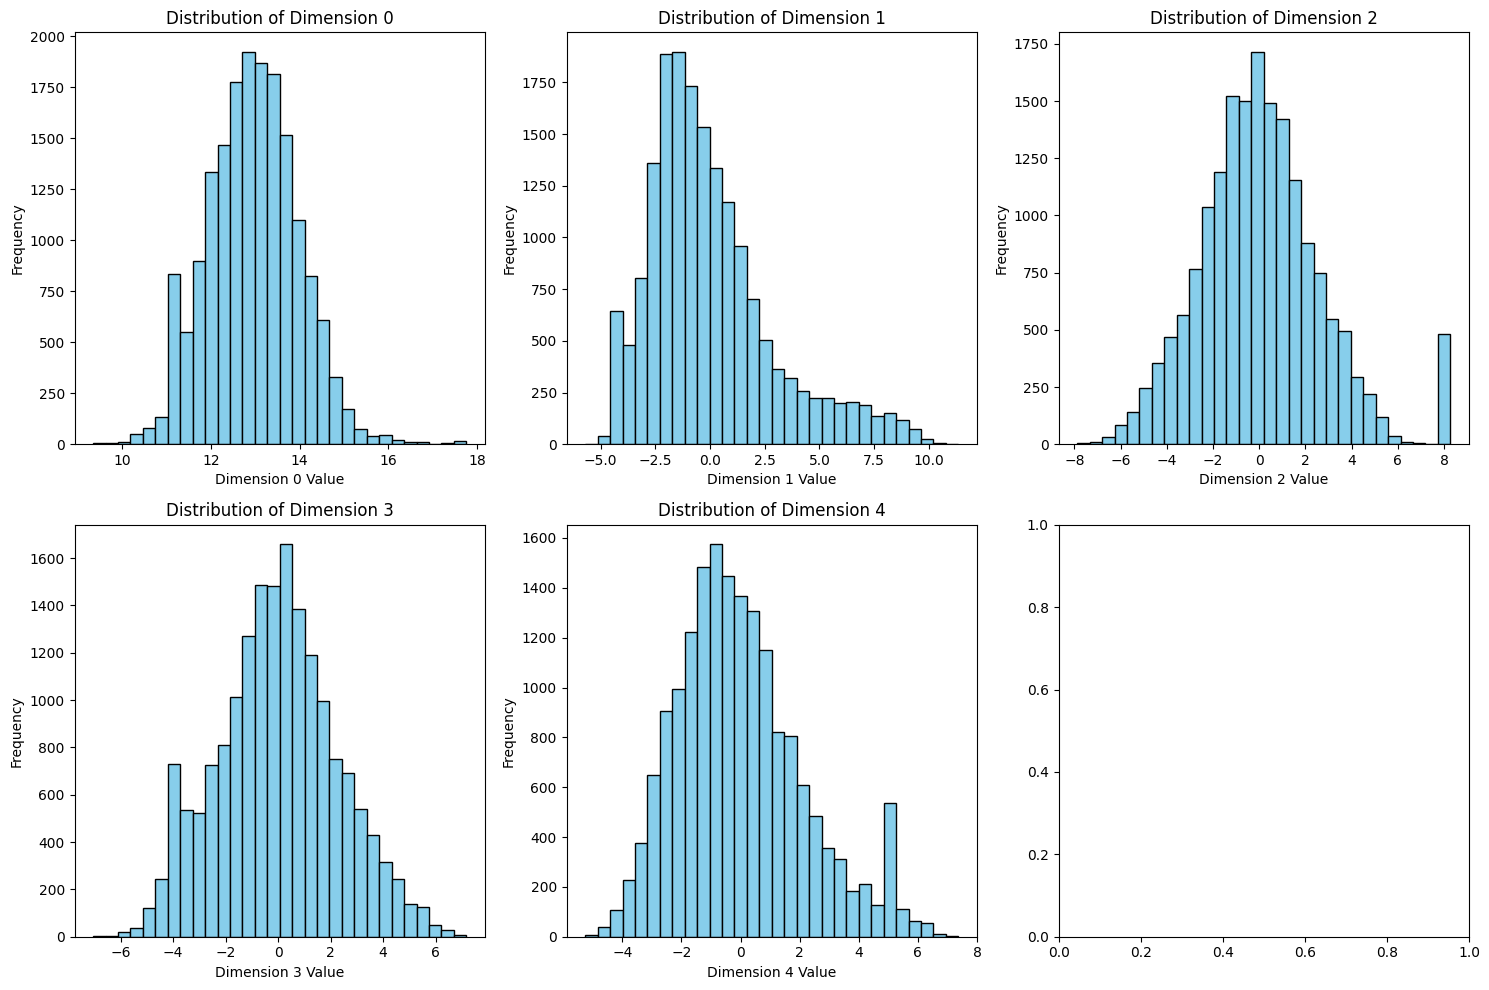

In [ ]:
# 스케일링 이전 그래프 시각화(2 : KC)
show_dimension_graph(df_sembed_kc)

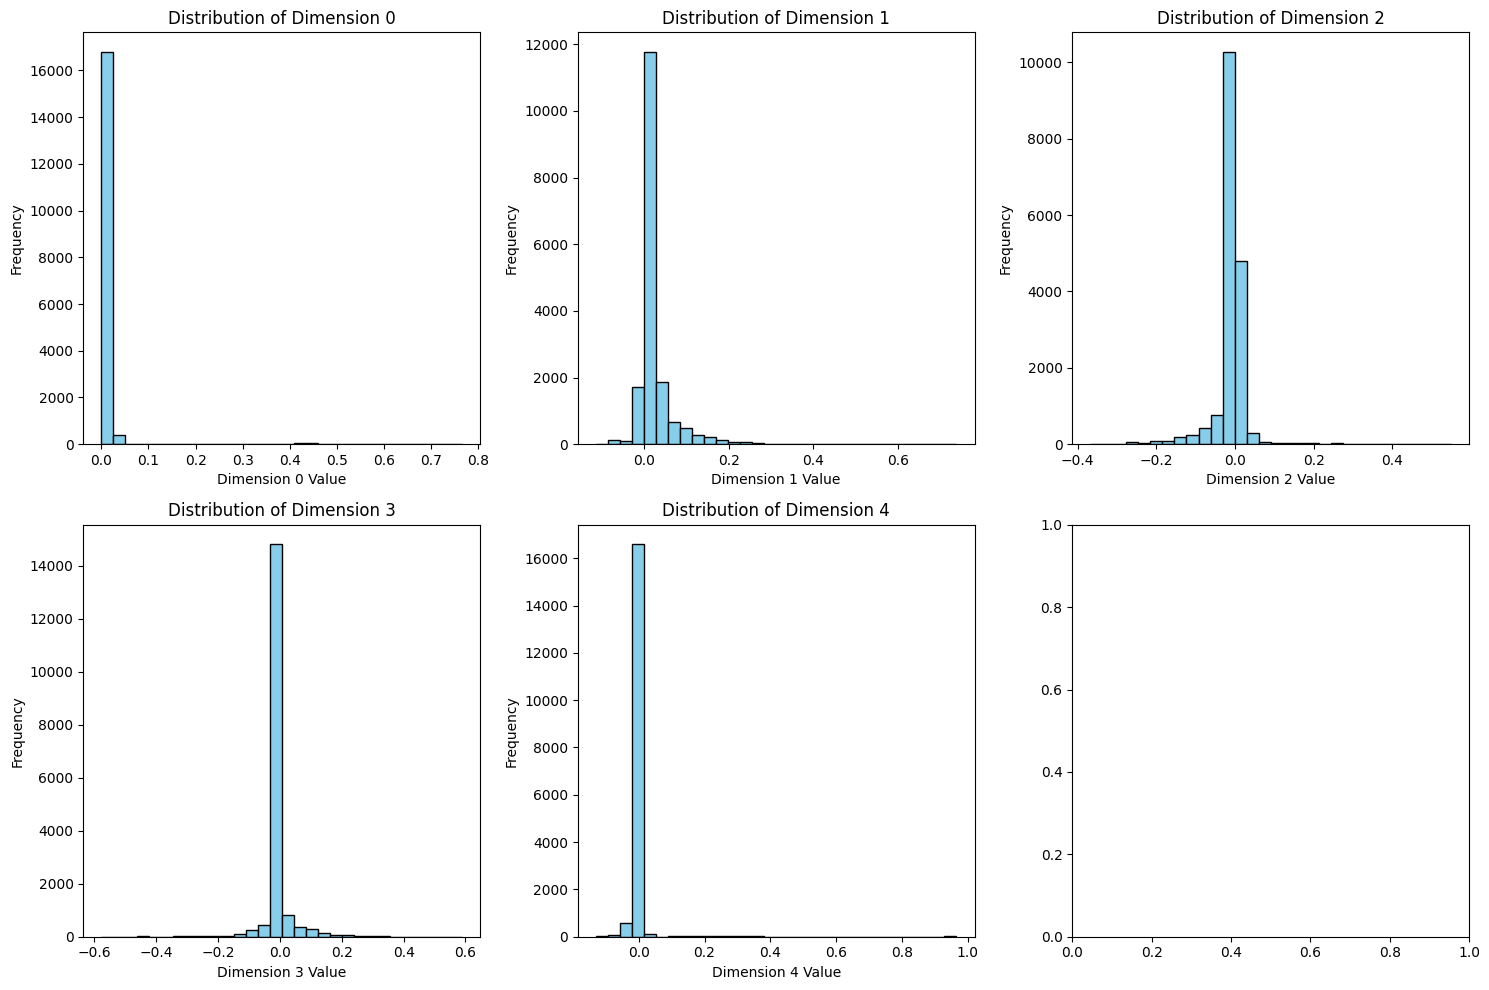

In [ ]:
# 스케일링 이전 그래프 시각화(3 : Tfidf)
show_dimension_graph(df_sembed_tfidf)

In [ ]:
df_sembed_kce_scaled = min_max_scaler(df_sembed_kce)
df_sembed_kce_scaled = zero_centered_scaling(df_sembed_kce_scaled)

In [ ]:
df_sembed_kc_scaled = min_max_scaler(df_sembed_kc)
df_sembed_kc_scaled = zero_centered_scaling(df_sembed_kc_scaled)

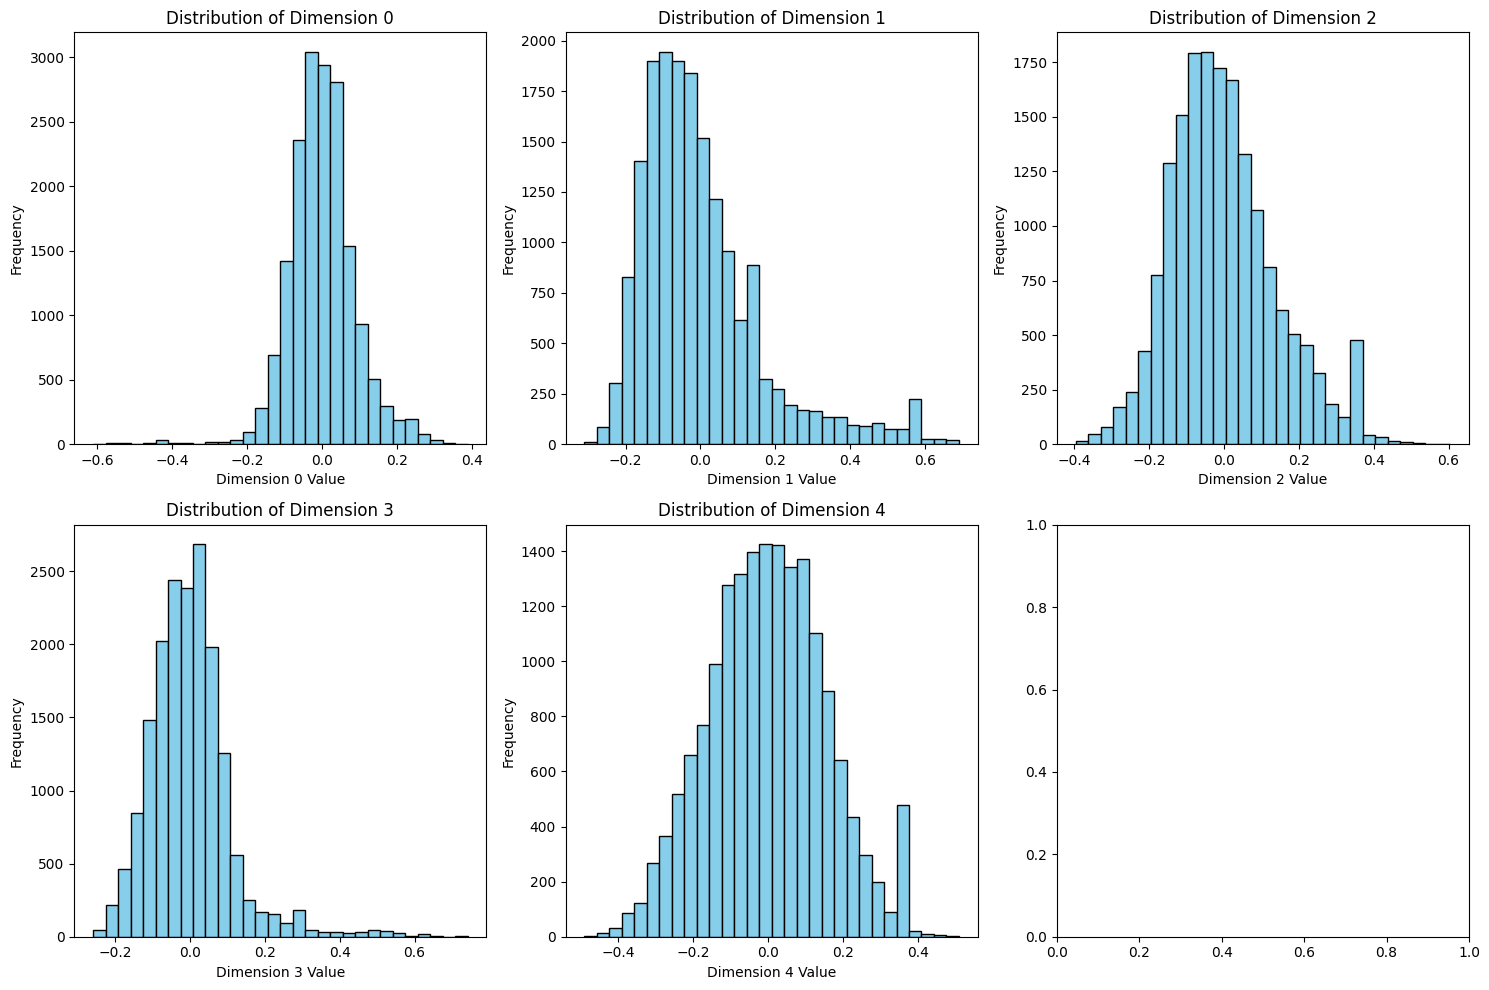

In [ ]:
# 스케일링 이후 그래프 시각화(1 : KCE)
show_dimension_graph(df_sembed_kce_scaled)

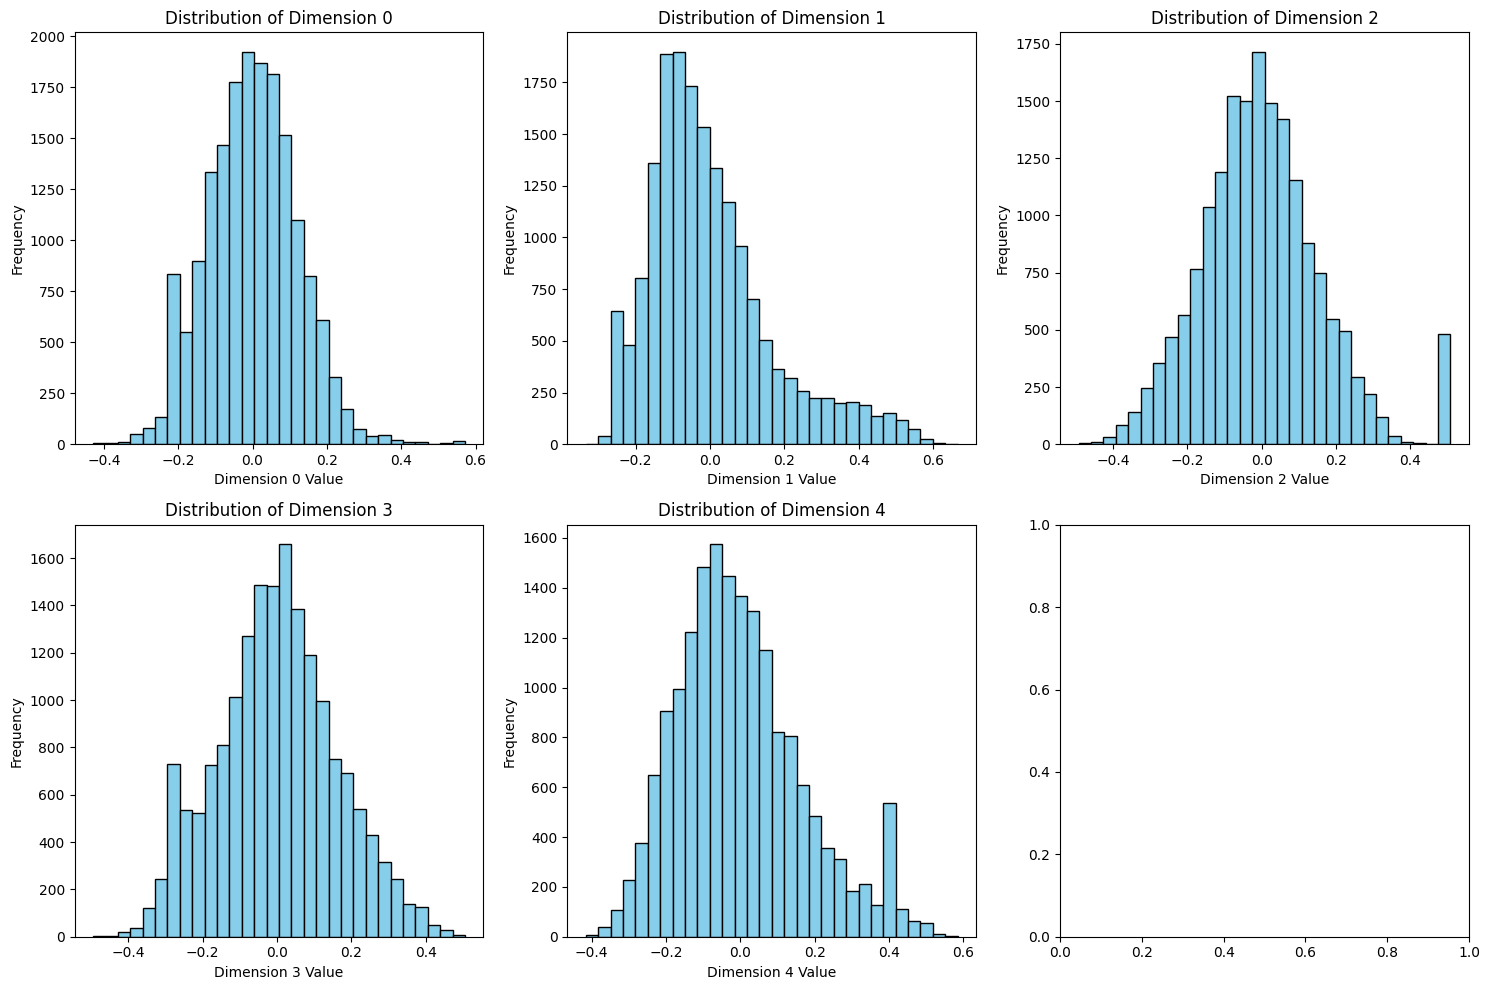

In [ ]:
# 스케일링 이후 그래프 시각화(2 : KC)
show_dimension_graph(df_sembed_kc_scaled)

# 6. 가중치 설정하기

> 기존에 제가 알려드린 방법 이외로 더 찾아보고 진행중에 있습니다.  
> split data는 클래스별로 비율이 동일하도록 stratify 파라미터를 사용하였고, 데이터 불균형이 심하여 SmoteTomek 라이브러리를 통해 Over/Under 샘플링을 동시에 진행하여 데이터 유실 문제를 최소화하였습니다.  
> 아래에는 class_weight 라이브러리를 통한 자동으로 weight을 지정할 때의 분포를 시각화하고 있습니다.



In [ ]:
# 개별 모델 셋팅 및 가중치 설정 전용 함수를 따로 py로 제작하였습니다.
%run pyfile/SetModel.py

<Figure size 640x480 with 0 Axes>

In [ ]:
# 아래 두개의 데이터프레임은 KCE, KC를 스케일과 정규화를 마친 데이터프레임입니다.
# copy하여 새로 담고 있습니다.

df_sembed_kce_ = df_sembed_kce_scaled.copy()
df_sembed_kc_ = df_sembed_kc_scaled.copy()

X_train shape :  (27380, 5)
X_test shape :  (6845, 5)
y_train shape :  (27380,)
y_test shape :  (6845,)
Auto Best Weights :  [1.0009505 0.9990513]


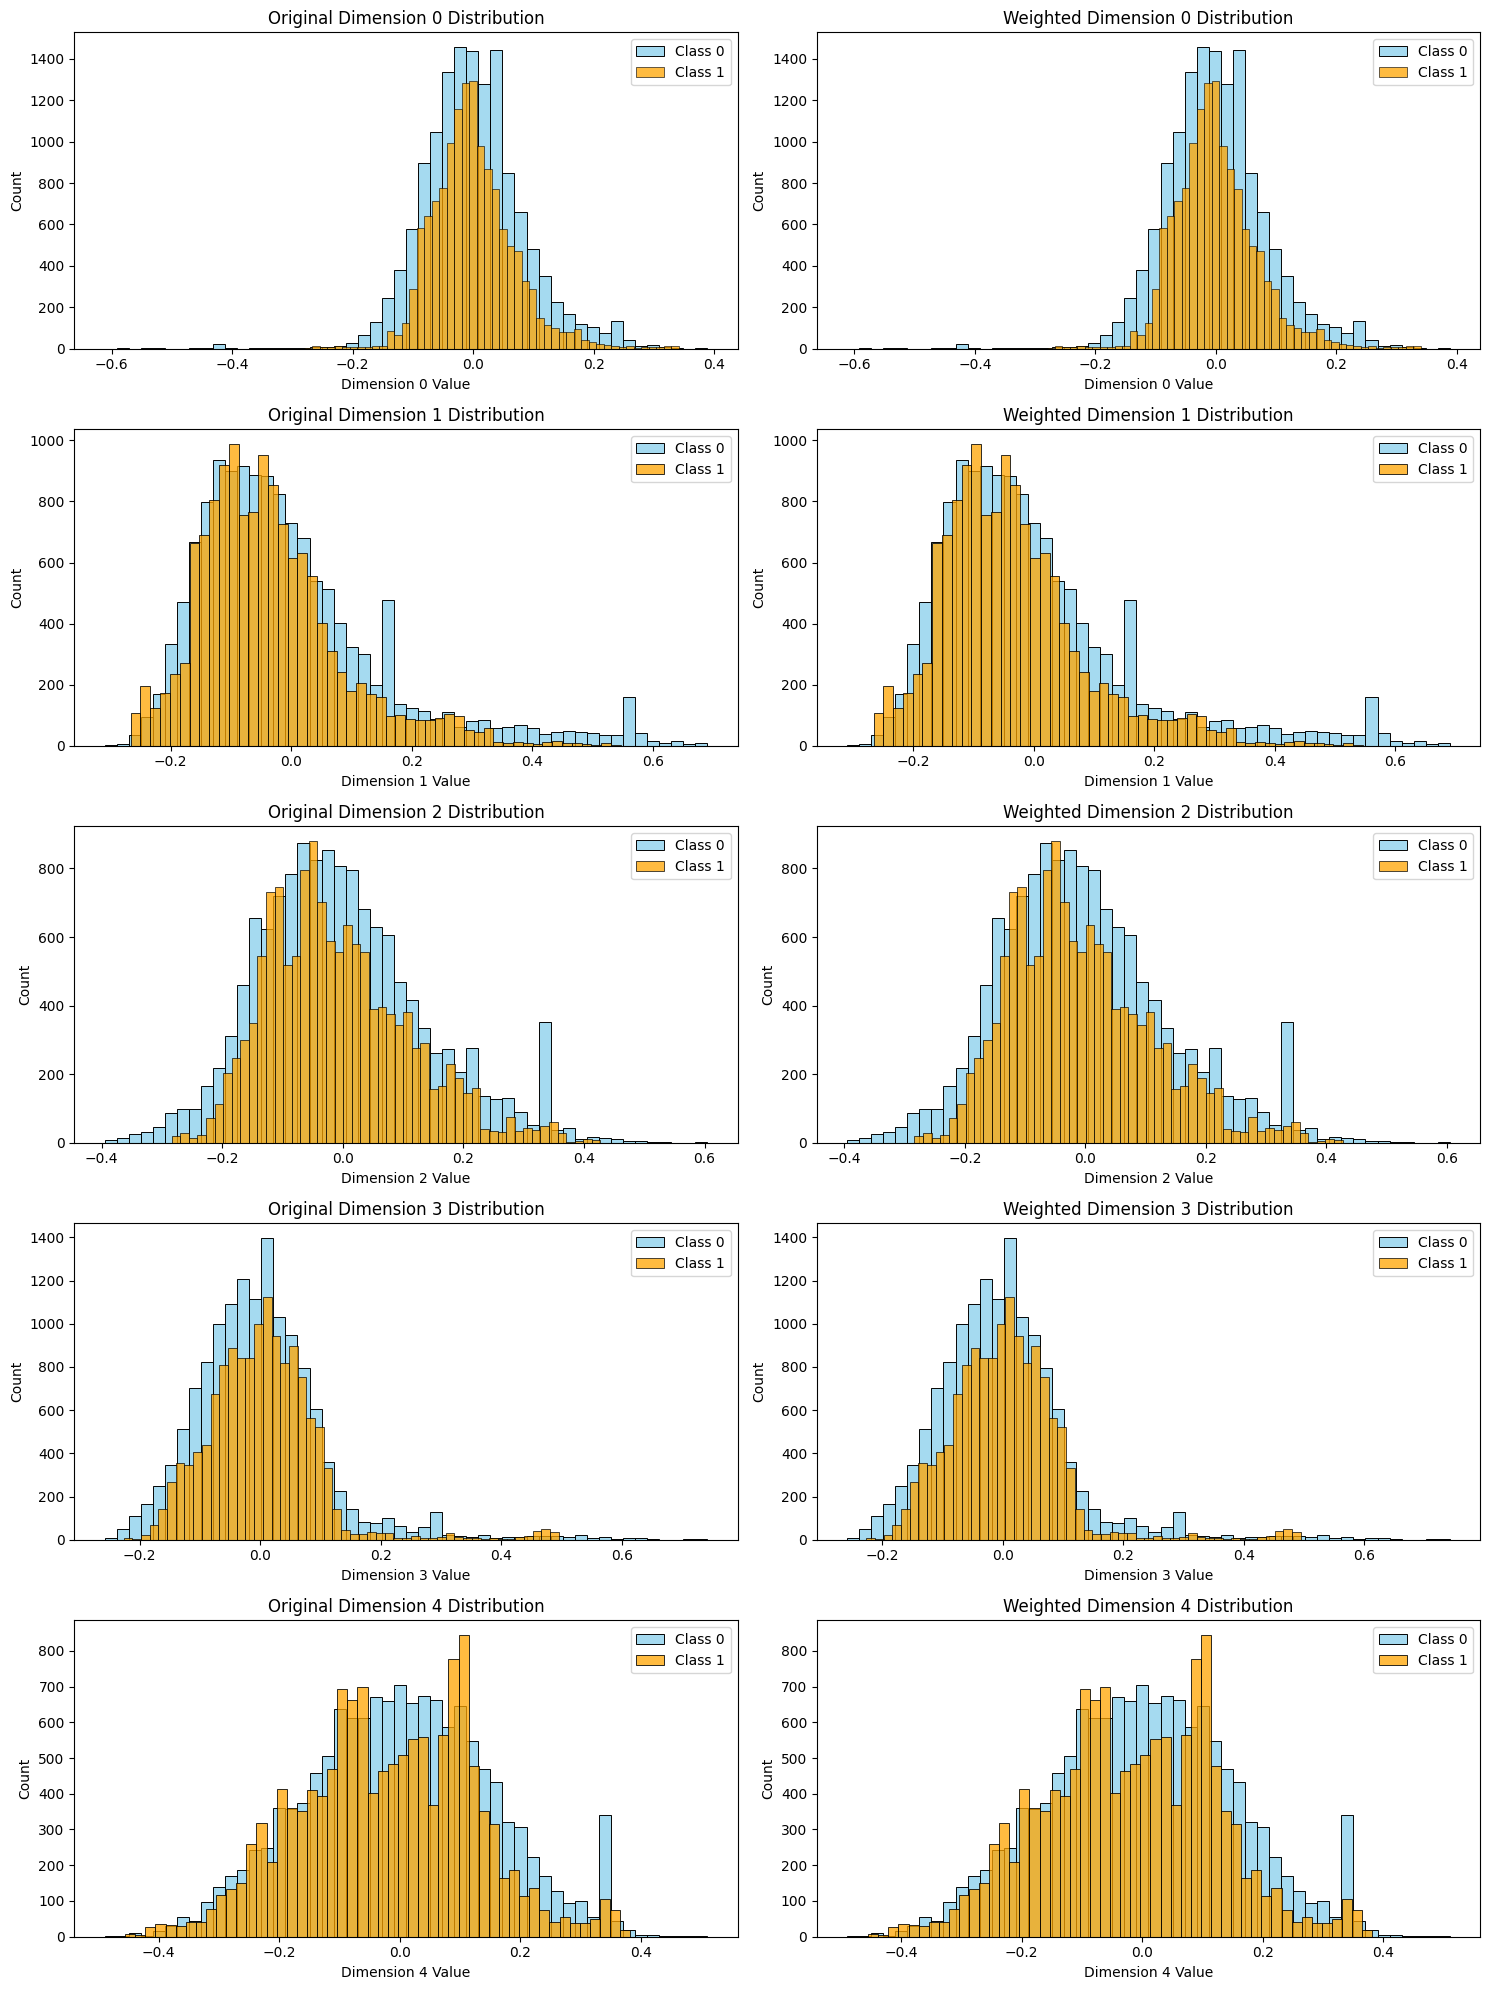

In [ ]:
# kcelectra
custom_dataset_kce = CustomDataset(df_sembed_kce_, 'kce')
X, y, df_kce = custom_dataset_kce.makeDataset()
datasetsplit_kce=custom_dataset_kce.splitdata()
custom_dataset_kce.showtypes()
class_weight_kce=custom_dataset_kce.setWeights()
print('Auto Best Weights : ',class_weight_kce)
# 가중치를 반영한 데이터 분포 시각화
custom_dataset_kce.show_weighted_vector_distribution()

X_train shape :  (27382, 5)
X_test shape :  (6846, 5)
y_train shape :  (27382,)
y_test shape :  (6846,)
Auto Best Weights :  [1.00087726 0.99912428]


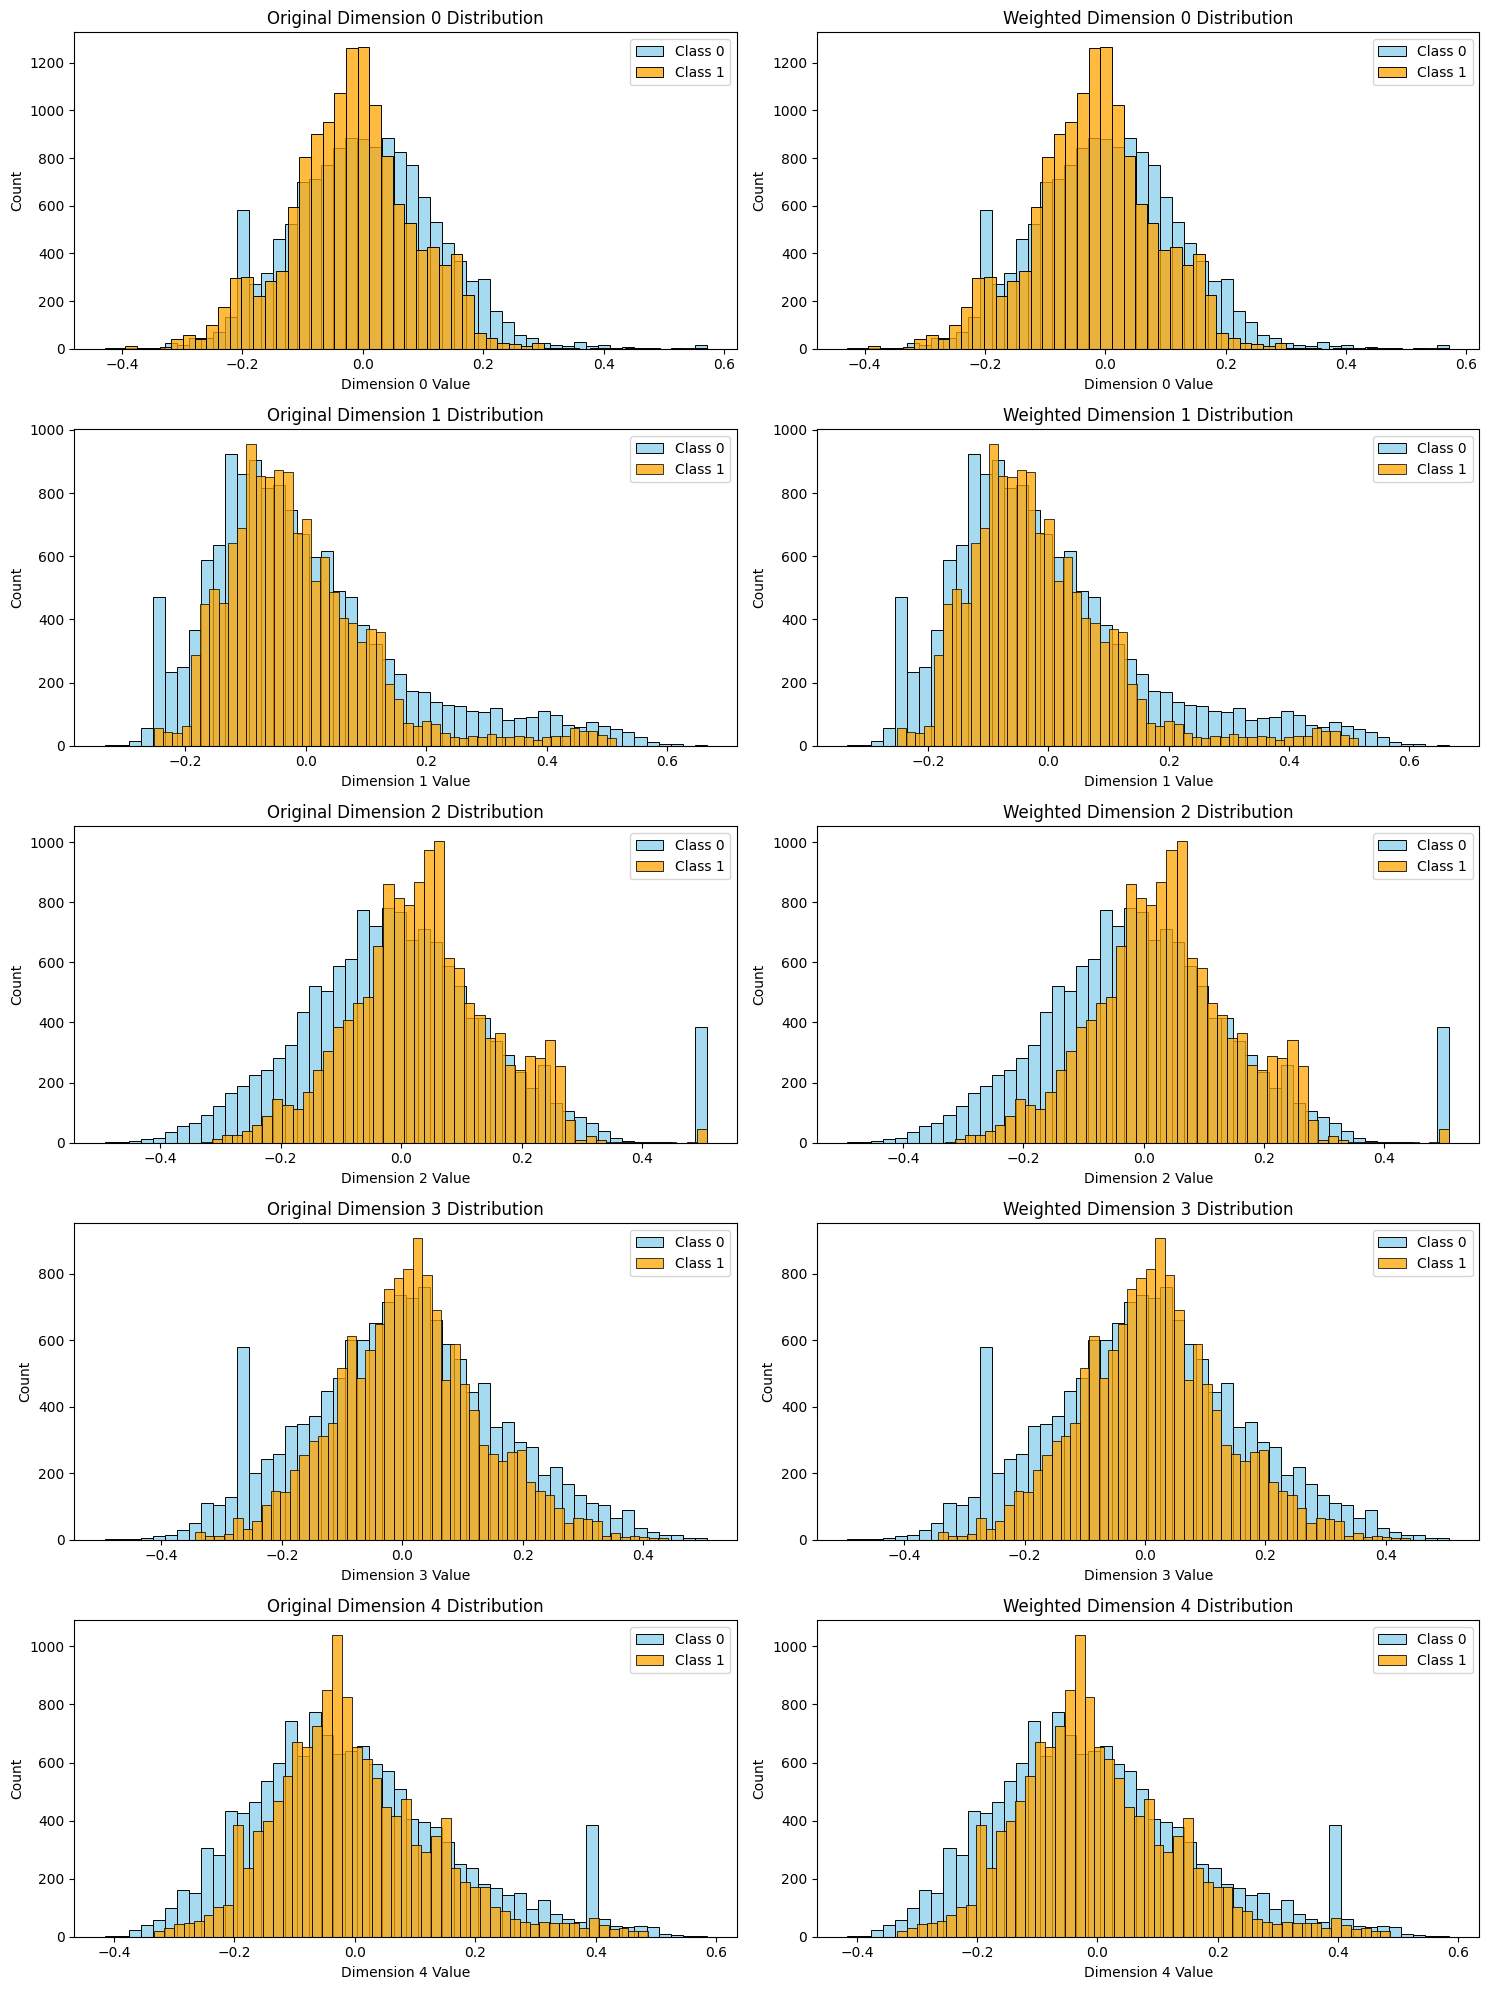

In [ ]:
# kcbert
custom_dataset_kc = CustomDataset(df_sembed_kc_, 'kc')
X, y, df_kc = custom_dataset_kc.makeDataset()
datasetsplit_kc=custom_dataset_kc.splitdata()
custom_dataset_kc.showtypes()
class_weight_kc=custom_dataset_kc.setWeights()
print('Auto Best Weights : ',class_weight_kc)
# 가중치를 반영한 데이터 분포 시각화
custom_dataset_kc.show_weighted_vector_distribution()

X_train shape :  (27305, 5)
X_test shape :  (6827, 5)
y_train shape :  (27305,)
y_test shape :  (6827,)
Auto Best Weights :  [1.00371269 0.99631468]


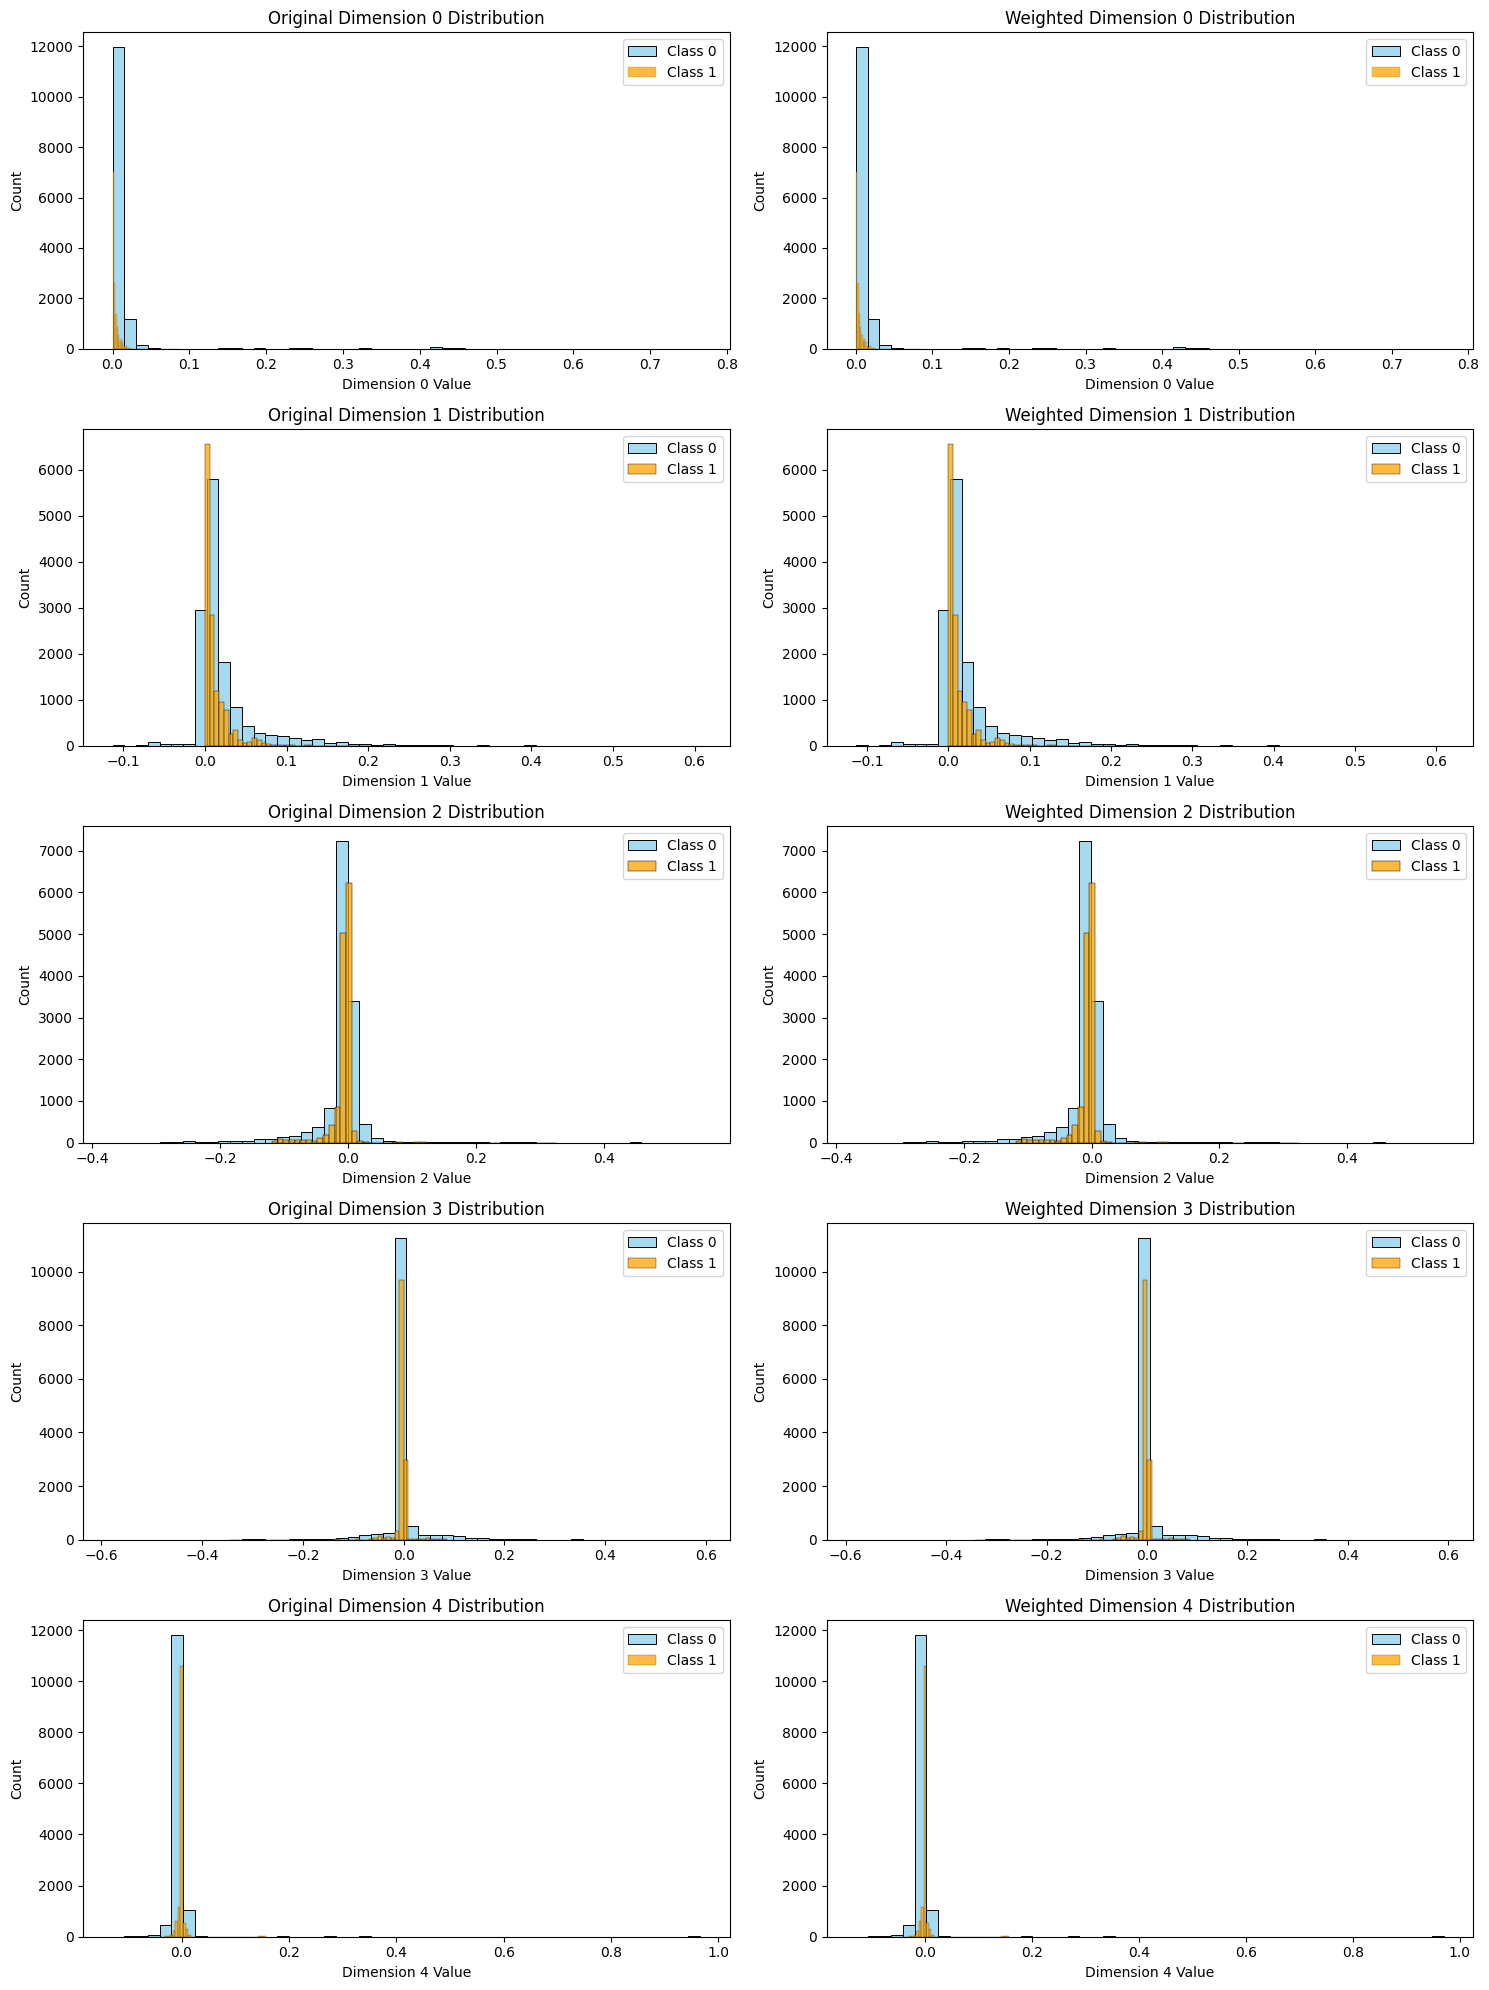

In [ ]:
# tfidf
custom_dataset_tfidf = CustomDataset(df_sembed_tfidf, 'tfidf')
X, y, df_tfidf = custom_dataset_tfidf.makeDataset()
datasetsplit_tfidf=custom_dataset_tfidf.splitdata()
custom_dataset_tfidf.showtypes()
class_weight_tfidf=custom_dataset_tfidf.setWeights()
print('Auto Best Weights : ',class_weight_tfidf)
# 가중치를 반영한 데이터 분포 시각화
custom_dataset_tfidf.show_weighted_vector_distribution()

In [ ]:
class_weight_kce

array([1.00124369, 0.9987594 ])

In [ ]:
class_weight_kc

array([1.00073083, 0.99927023])

In [ ]:
class_weight_tfidf

array([1.00337962, 0.99664307])

In [ ]:
# def makeboxplot(df, class_0_weight=1, class_1_weight=1):
#     # 문자열을 정수로 변환
#     box_plot_df_sembed = df.copy()
#     box_plot_df_sembed['class'] = box_plot_df_sembed['class'].astype(int)
#     columns_to_plot = box_plot_df_sembed.columns[:-1]
#     num_columns = 3
#     for i in range(0, len(columns_to_plot), num_columns):
#         fig = make_subplots(rows=1, cols=num_columns)
#         for j, col in enumerate(columns_to_plot[i:i + num_columns]):
#             # 클래스 0은 blue, 클래스 1은 red로 색상 할당
#             colors = box_plot_df_sembed['class'].map({0: 'blue', 1: 'red'})

#             # Find the mode value in class 0 for the specific column
#             mode_value_class_0 = statistics.mode(box_plot_df_sembed.loc[box_plot_df_sembed['class'] == 0, col])

#             # Apply weights to the respective classes using mode value
#             box_plot_df_sembed.loc[box_plot_df_sembed['class'] == 0, col] *= class_0_weight
#             box_plot_df_sembed.loc[box_plot_df_sembed['class'] == 1, col] = (box_plot_df_sembed.loc[box_plot_df_sembed['class'] == 1, col] + mode_value_class_0) * class_1_weight

#             fig.add_trace(go.Box(x=box_plot_df_sembed['class'][box_plot_df_sembed['class'] == 0],
#                                 y=box_plot_df_sembed[col][box_plot_df_sembed['class'] == 0],
#                                 marker_color='blue'), row=1, col=j + 1)
#             fig.add_trace(go.Box(x=box_plot_df_sembed['class'][box_plot_df_sembed['class'] == 1],
#                                 y=box_plot_df_sembed[col][box_plot_df_sembed['class'] == 1],
#                                 marker_color='red'), row=1, col=j + 1)
#         if len(columns_to_plot) == i + num_columns - 1:
#             fig.update_layout(title_text=f"Boxplot for Embedded Columns {i+1}~{i+num_columns-1}")
#         else:
#             fig.update_layout(title_text=f"Boxplot for Embedded Columns {i+1}~{i+num_columns}")
#         fig.show()
#     return box_plot_df_sembed


In [ ]:
# box_plot_df_sembed_kce=makeboxplot(df_sembed_kce,1,1) # default parameter는 df=df_sembed_tfidf, class_0_weight=1, class_1_weight=1로 잡았습니다.

In [ ]:
# box_plot_df_sembed_kc=makeboxplot(df_sembed_kc,1,1) # default parameter는 df=df_sembed_tfidf, class_0_weight=1, class_1_weight=1로 잡았습니다.

In [ ]:
# box_plot_df_sembed_tfidf=makeboxplot(df_sembed_tfidf,1,1) # default parameter는 df=df_sembed_tfidf, class_0_weight=1, class_1_weight=1로 잡았습니다.

# 7. CNN1D 분석 모델개요

> (7-1) Shallow CNN(SCNN)

> (7-2) Moderate CNN(MCNN)

> (7-3) Deep CNN(DCNN)

(1) CNN1D 분석 모델개요

> (1-1) Shallow CNN(SCNN)

> (1-2) Moderate CNN(MCNN)

> (1-3) Deep CNN(DCNN)

In [ ]:
# 개별 모델 셋팅 및 가중치 설정 전용 함수를 따로 py로 제작하였습니다.
%run pyfile/SetModel.py

<Figure size 640x480 with 0 Axes>

In [ ]:
datasetsplit_list = [datasetsplit_kce, datasetsplit_kc, datasetsplit_tfidf]
classweight_list = [class_weight_kce, class_weight_kc, class_weight_tfidf]
dataset_list = [df_kce, df_kc, df_tfidf]

Grid Search Best Weights :  {0: 1.0009505008408277, 1: 0.9990513026344596}
Epoch 1/50
428/428 [==============================] - 3s 5ms/step - loss: 0.6780 - accuracy: 0.5640
Epoch 2/50
428/428 [==============================] - 2s 4ms/step - loss: 0.6641 - accuracy: 0.5905
Epoch 3/50
428/428 [==============================] - 2s 5ms/step - loss: 0.6550 - accuracy: 0.5998
Epoch 4/50
428/428 [==============================] - 2s 5ms/step - loss: 0.6483 - accuracy: 0.6102
Epoch 5/50
428/428 [==============================] - 2s 5ms/step - loss: 0.6432 - accuracy: 0.6202
Epoch 6/50
428/428 [==============================] - 2s 4ms/step - loss: 0.6380 - accuracy: 0.6313
Epoch 7/50
428/428 [==============================] - 2s 4ms/step - loss: 0.6341 - accuracy: 0.6347
Epoch 8/50
428/428 [==============================] - 2s 4ms/step - loss: 0.6306 - accuracy: 0.6416
Epoch 9/50
428/428 [==============================] - 2s 6ms/step - loss: 0.6265 - accuracy: 0.6469
Epoch 10/50
428/428 [====

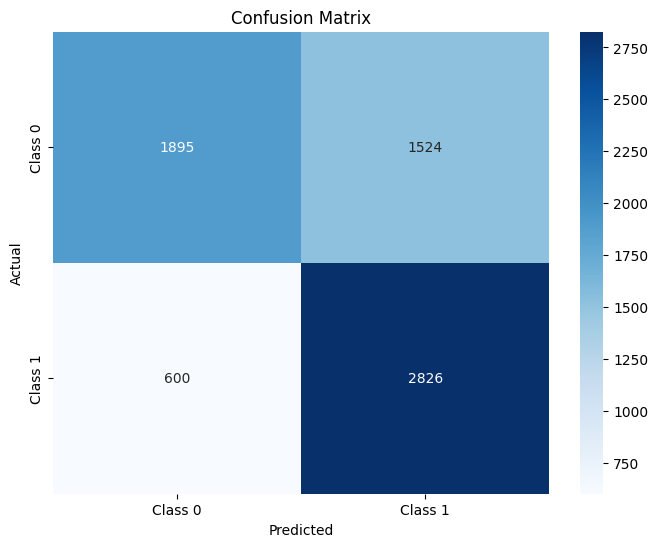

Accuracy: 0.689700511322133
Precision: 0.7595190380761523
Recall(TNR): 0.8248686514886164
F1 Score: 0.726851851851852
True Positive Rate (TPR): 0.5542556303012577
False Positive Rate (FPR): 0.4457443696987423


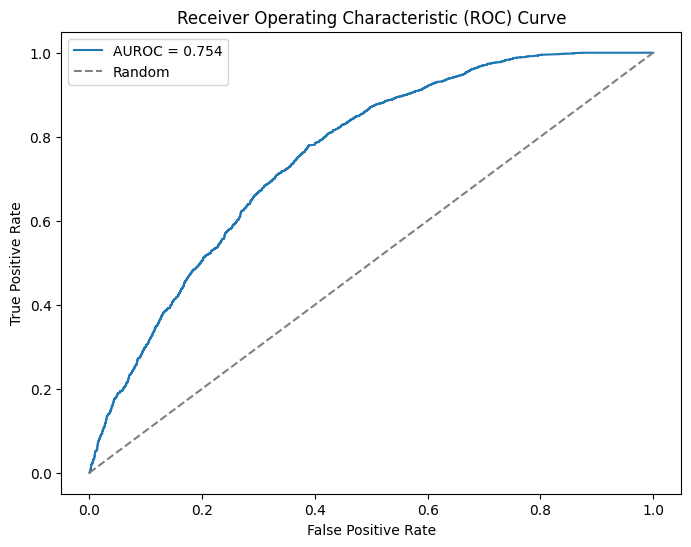

In [ ]:
scnn_model=ModelMaker('shallow_cnn', 'kce', datasetsplit_list, classweight_list, dataset_list)
#scnn_model=ModelMaker('shallow_cnn', 'kc', datasetsplit_list, classweight_list, dataset_list)
#scnn_model=ModelMaker('shallow_cnn', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

scnn_model.fitlogic()
scnn_model.predictlogic()

Grid Search Best Weights :  {0: 1.0037126893103956, 1: 0.9963146756184778}
Epoch 1/50
427/427 [==============================] - 3s 5ms/step - loss: 0.6722 - accuracy: 0.5600
Epoch 2/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6598 - accuracy: 0.5775
Epoch 3/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6564 - accuracy: 0.5832
Epoch 4/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6547 - accuracy: 0.5843
Epoch 5/50
427/427 [==============================] - 2s 6ms/step - loss: 0.6538 - accuracy: 0.5822
Epoch 6/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6517 - accuracy: 0.5870
Epoch 7/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6512 - accuracy: 0.5881
Epoch 8/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6495 - accuracy: 0.5909
Epoch 9/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6488 - accuracy: 0.5947
Epoch 10/50
427/427 [====

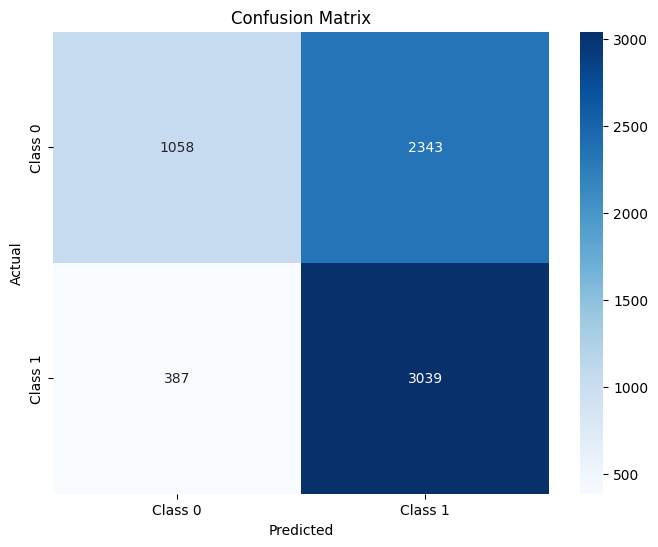

Accuracy: 0.6001171817782335
Precision: 0.7321799307958478
Recall(TNR): 0.8870402802101576
F1 Score: 0.6900544959128064
True Positive Rate (TPR): 0.3110849750073508
False Positive Rate (FPR): 0.6889150249926492


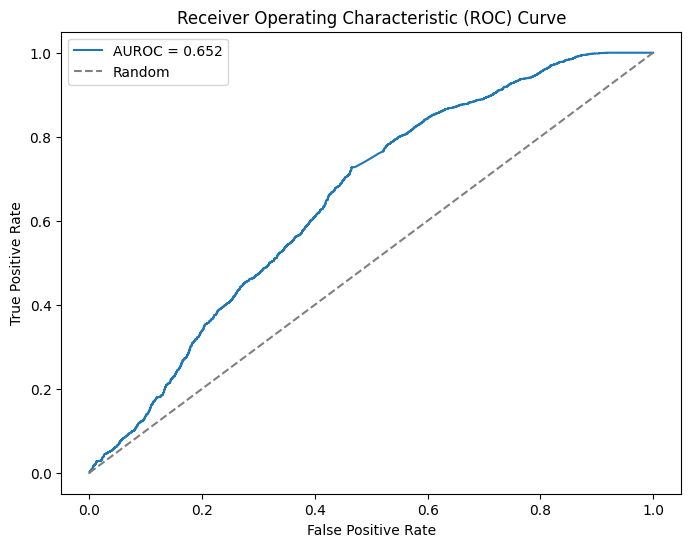

In [ ]:
#scnn_model=ModelMaker('shallow_cnn', 'kce', datasetsplit_list, classweight_list, dataset_list)
scnn_model=ModelMaker('shallow_cnn', 'kc', datasetsplit_list, classweight_list, dataset_list)
#scnn_model=ModelMaker('shallow_cnn', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

scnn_model.fitlogic()
scnn_model.predictlogic()

Grid Search Best Weights :  {0: 1.0037126893103956, 1: 0.9963146756184778}
Epoch 1/50
427/427 [==============================] - 3s 5ms/step - loss: 0.6750 - accuracy: 0.5506
Epoch 2/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6616 - accuracy: 0.5743
Epoch 3/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6589 - accuracy: 0.5789
Epoch 4/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6570 - accuracy: 0.5796
Epoch 5/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6557 - accuracy: 0.5839
Epoch 6/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6544 - accuracy: 0.5842
Epoch 7/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6530 - accuracy: 0.5854
Epoch 8/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6521 - accuracy: 0.5852
Epoch 9/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6505 - accuracy: 0.5923
Epoch 10/50
427/427 [====

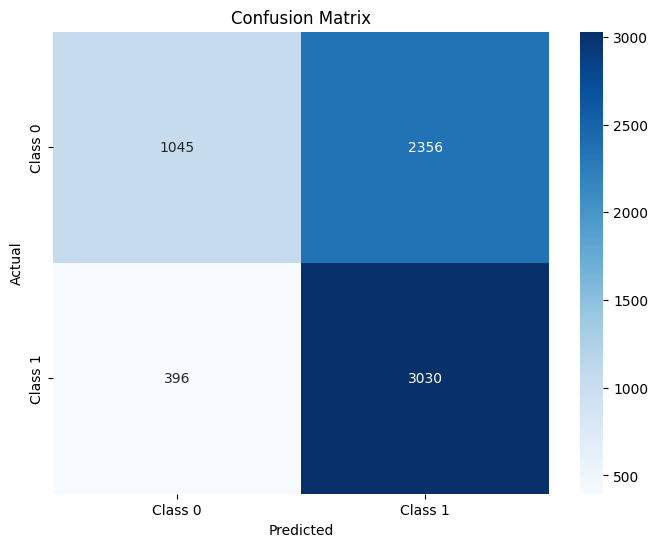

Accuracy: 0.5968946828768127
Precision: 0.7251908396946565
Recall(TNR): 0.8844133099824869
F1 Score: 0.6876985928279619
True Positive Rate (TPR): 0.30726256983240224
False Positive Rate (FPR): 0.6927374301675978


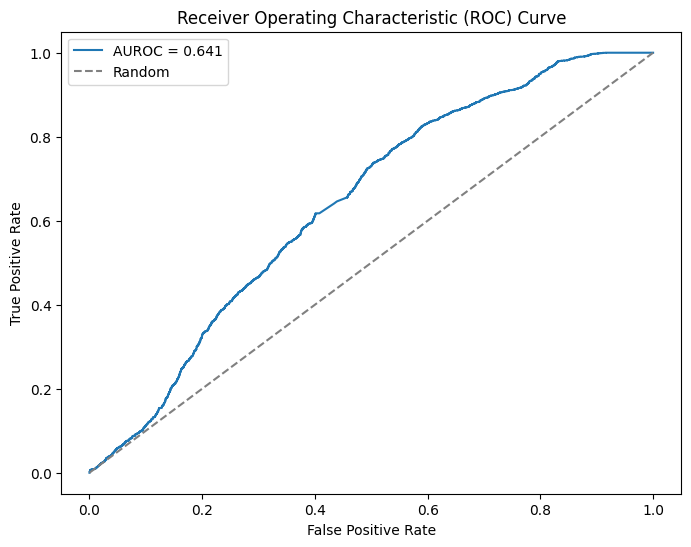

In [ ]:
#scnn_model=ModelMaker('shallow_cnn', 'kce', datasetsplit_list, classweight_list, dataset_list)
#scnn_model=ModelMaker('shallow_cnn', 'kc', datasetsplit_list, classweight_list, dataset_list)
scnn_model=ModelMaker('shallow_cnn', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

scnn_model.fitlogic()
scnn_model.predictlogic()

Grid Search Best Weights :  {0: 1.0009505008408277, 1: 0.9990513026344596}
Epoch 1/50
428/428 [==============================] - 4s 6ms/step - loss: 0.6674 - accuracy: 0.5811
Epoch 2/50
428/428 [==============================] - 2s 5ms/step - loss: 0.6399 - accuracy: 0.6228
Epoch 3/50
428/428 [==============================] - 2s 5ms/step - loss: 0.6219 - accuracy: 0.6400
Epoch 4/50
428/428 [==============================] - 3s 7ms/step - loss: 0.6085 - accuracy: 0.6552
Epoch 5/50
428/428 [==============================] - 2s 5ms/step - loss: 0.5975 - accuracy: 0.6674
Epoch 6/50
428/428 [==============================] - 2s 5ms/step - loss: 0.5862 - accuracy: 0.6795
Epoch 7/50
428/428 [==============================] - 2s 5ms/step - loss: 0.5791 - accuracy: 0.6840
Epoch 8/50
428/428 [==============================] - 2s 5ms/step - loss: 0.5683 - accuracy: 0.6935
Epoch 9/50
428/428 [==============================] - 2s 5ms/step - loss: 0.5590 - accuracy: 0.7013
Epoch 10/50
428/428 [====

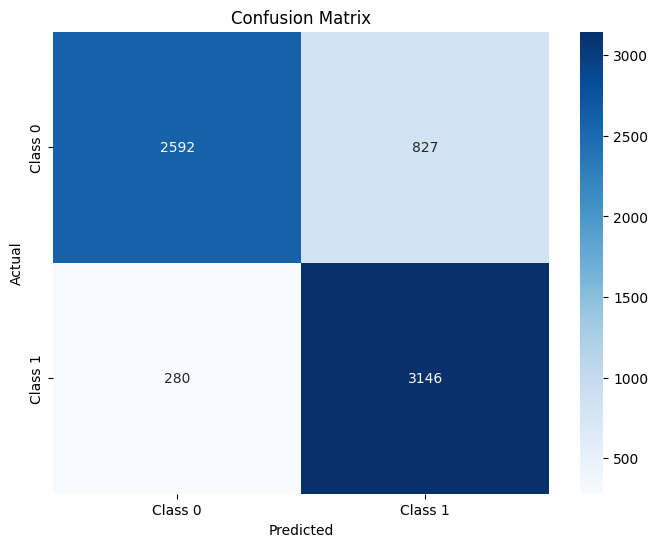

Accuracy: 0.8382761139517896
Precision: 0.9025069637883009
Recall(TNR): 0.9182720373613543
F1 Score: 0.8503851871874577
True Positive Rate (TPR): 0.7581164083065224
False Positive Rate (FPR): 0.24188359169347762


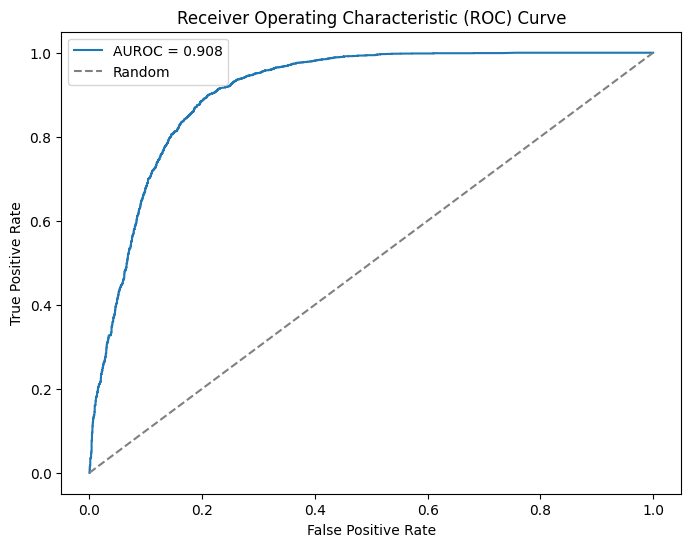

In [ ]:
mcnn_model=ModelMaker('moderate_cnn', 'kce', datasetsplit_list, classweight_list, dataset_list)
#mcnn_model=ModelMaker('moderate_cnn', 'kc', datasetsplit_list, classweight_list, dataset_list)
#mcnn_model=ModelMaker('moderate_cnn', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

mcnn_model.fitlogic()
mcnn_model.predictlogic()

Grid Search Best Weights :  {0: 1.0037126893103956, 1: 0.9963146756184778}
Epoch 1/50
427/427 [==============================] - 3s 5ms/step - loss: 0.6670 - accuracy: 0.5617
Epoch 2/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6540 - accuracy: 0.5855
Epoch 3/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6477 - accuracy: 0.6011
Epoch 4/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6435 - accuracy: 0.6076
Epoch 5/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6404 - accuracy: 0.6094
Epoch 6/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6371 - accuracy: 0.6138
Epoch 7/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6340 - accuracy: 0.6201
Epoch 8/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6321 - accuracy: 0.6215
Epoch 9/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6289 - accuracy: 0.6229
Epoch 10/50
427/427 [====

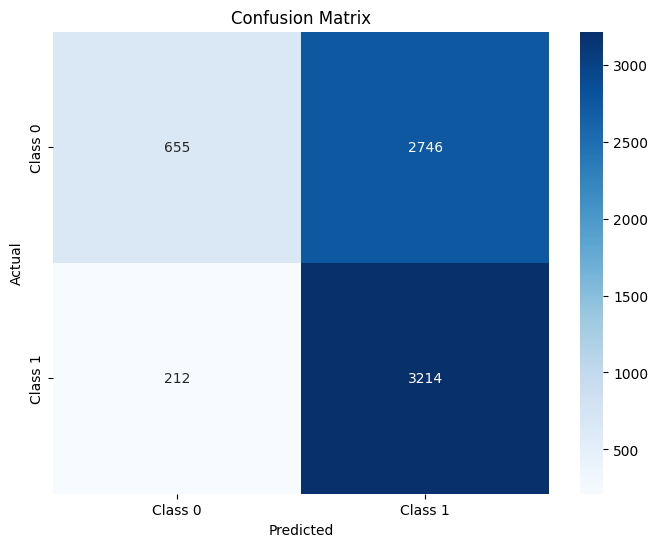

Accuracy: 0.5667203749816904
Precision: 0.7554786620530565
Recall(TNR): 0.9381202568593111
F1 Score: 0.6848497762625186
True Positive Rate (TPR): 0.1925904145839459
False Positive Rate (FPR): 0.8074095854160541


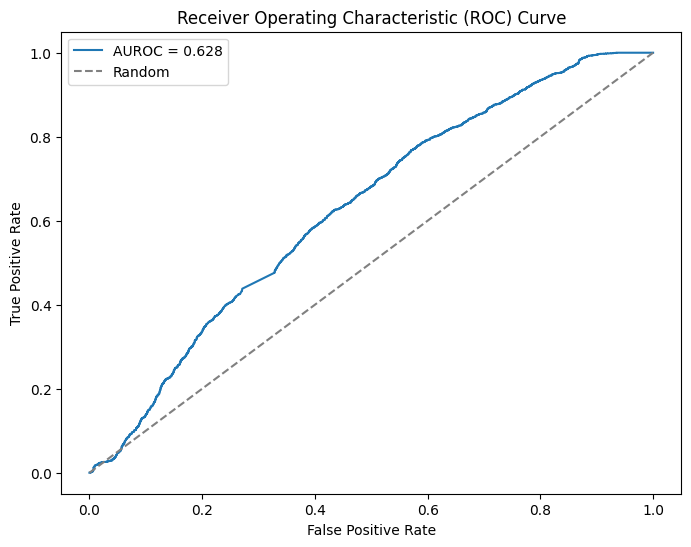

In [ ]:
#mcnn_model=ModelMaker('moderate_cnn', 'kce', datasetsplit_list, classweight_list, dataset_list)
mcnn_model=ModelMaker('moderate_cnn', 'kc', datasetsplit_list, classweight_list, dataset_list)
#mcnn_model=ModelMaker('moderate_cnn', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

mcnn_model.fitlogic()
mcnn_model.predictlogic()

Grid Search Best Weights :  {0: 1.0037126893103956, 1: 0.9963146756184778}
Epoch 1/50
427/427 [==============================] - 4s 5ms/step - loss: 0.6660 - accuracy: 0.5678
Epoch 2/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6541 - accuracy: 0.5855
Epoch 3/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6487 - accuracy: 0.5979
Epoch 4/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6456 - accuracy: 0.6024
Epoch 5/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6425 - accuracy: 0.6063
Epoch 6/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6392 - accuracy: 0.6102
Epoch 7/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6357 - accuracy: 0.6168
Epoch 8/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6336 - accuracy: 0.6196
Epoch 9/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6310 - accuracy: 0.6180
Epoch 10/50
427/427 [====

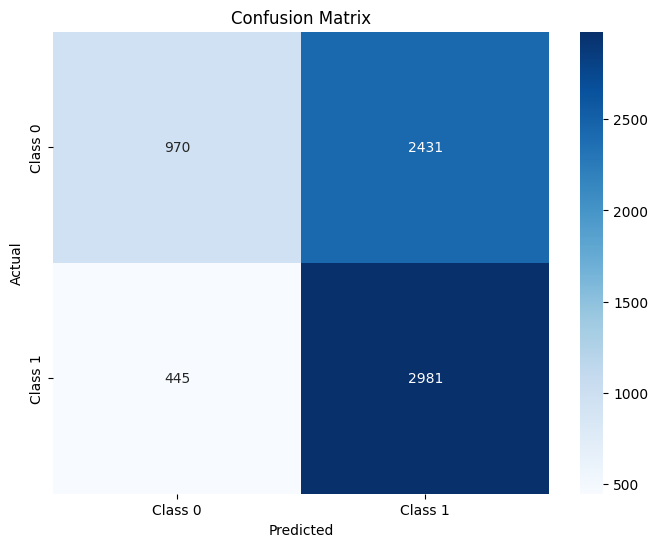

Accuracy: 0.5787315072506225
Precision: 0.6855123674911661
Recall(TNR): 0.8701109165207239
F1 Score: 0.6745870106358905
True Positive Rate (TPR): 0.28521023228462217
False Positive Rate (FPR): 0.7147897677153778


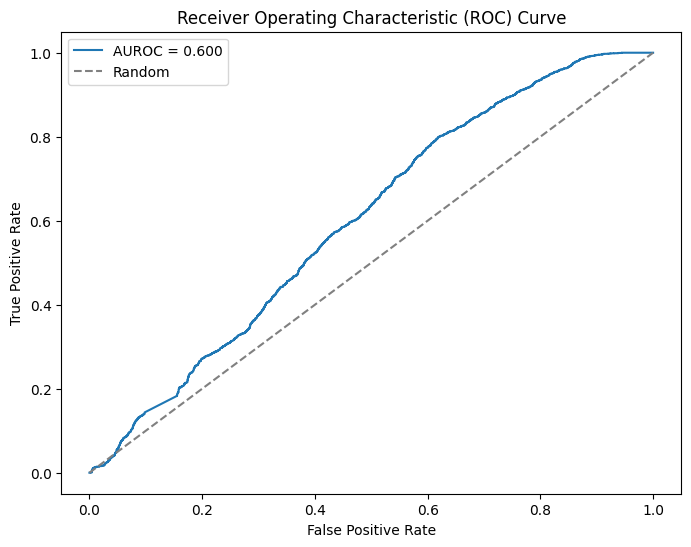

In [ ]:
#mcnn_model=ModelMaker('moderate_cnn', 'kce', datasetsplit_list, classweight_list, dataset_list)
#mcnn_model=ModelMaker('moderate_cnn', 'kc', datasetsplit_list, classweight_list, dataset_list)
mcnn_model=ModelMaker('moderate_cnn', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

mcnn_model.fitlogic()
mcnn_model.predictlogic()

Grid Search Best Weights :  {0: 1.0009505008408277, 1: 0.9990513026344596}
Epoch 1/50
428/428 [==============================] - 4s 7ms/step - loss: 0.6655 - accuracy: 0.5816
Epoch 2/50
428/428 [==============================] - 3s 6ms/step - loss: 0.6314 - accuracy: 0.6294
Epoch 3/50
428/428 [==============================] - 2s 6ms/step - loss: 0.6030 - accuracy: 0.6600
Epoch 4/50
428/428 [==============================] - 2s 5ms/step - loss: 0.5757 - accuracy: 0.6881
Epoch 5/50
428/428 [==============================] - 2s 5ms/step - loss: 0.5517 - accuracy: 0.7089
Epoch 6/50
428/428 [==============================] - 3s 6ms/step - loss: 0.5308 - accuracy: 0.7243
Epoch 7/50
428/428 [==============================] - 2s 6ms/step - loss: 0.5086 - accuracy: 0.7380
Epoch 8/50
428/428 [==============================] - 2s 6ms/step - loss: 0.4903 - accuracy: 0.7548
Epoch 9/50
428/428 [==============================] - 2s 6ms/step - loss: 0.4722 - accuracy: 0.7644
Epoch 10/50
428/428 [====

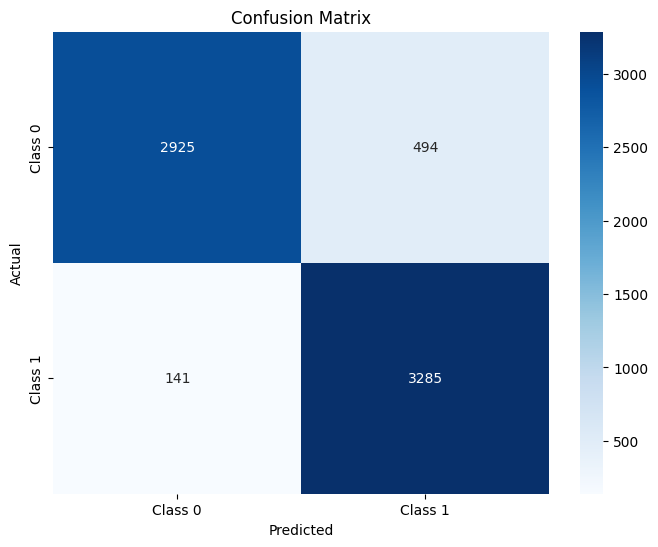

Accuracy: 0.9072315558802045
Precision: 0.9540117416829745
Recall(TNR): 0.9588441330998249
F1 Score: 0.9118667591950034
True Positive Rate (TPR): 0.8555133079847909
False Positive Rate (FPR): 0.1444866920152091


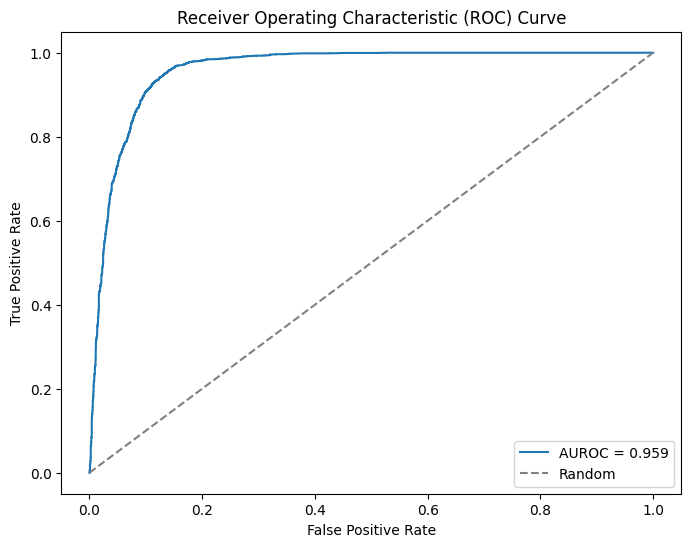

In [ ]:
deep_cnn=ModelMaker('deep_cnn', 'kce', datasetsplit_list, classweight_list, dataset_list)
#deep_cnn=ModelMaker('deep_cnn', 'kc', datasetsplit_list, classweight_list, dataset_list)
#deep_cnn=ModelMaker('deep_cnn', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

deep_cnn.fitlogic()
deep_cnn.predictlogic()

Grid Search Best Weights :  {0: 1.0037126893103956, 1: 0.9963146756184778}
Epoch 1/50
427/427 [==============================] - 4s 6ms/step - loss: 0.6652 - accuracy: 0.5665
Epoch 2/50
427/427 [==============================] - 2s 6ms/step - loss: 0.6517 - accuracy: 0.5910
Epoch 3/50
427/427 [==============================] - 2s 6ms/step - loss: 0.6459 - accuracy: 0.6017
Epoch 4/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6431 - accuracy: 0.6064
Epoch 5/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6380 - accuracy: 0.6150
Epoch 6/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6341 - accuracy: 0.6151
Epoch 7/50
427/427 [==============================] - 2s 6ms/step - loss: 0.6313 - accuracy: 0.6180
Epoch 8/50
427/427 [==============================] - 2s 6ms/step - loss: 0.6269 - accuracy: 0.6226
Epoch 9/50
427/427 [==============================] - 3s 7ms/step - loss: 0.6250 - accuracy: 0.6254
Epoch 10/50
427/427 [====

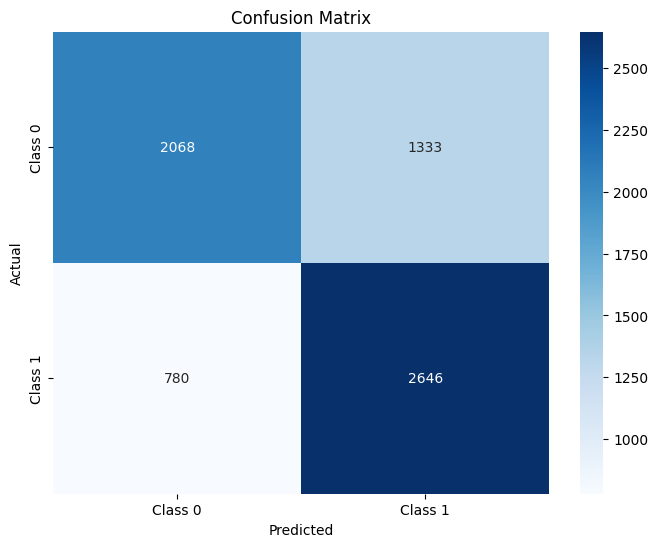

Accuracy: 0.6904936282408085
Precision: 0.726123595505618
Recall(TNR): 0.7723292469352014
F1 Score: 0.7146522619851452
True Positive Rate (TPR): 0.6080564539841223
False Positive Rate (FPR): 0.39194354601587766


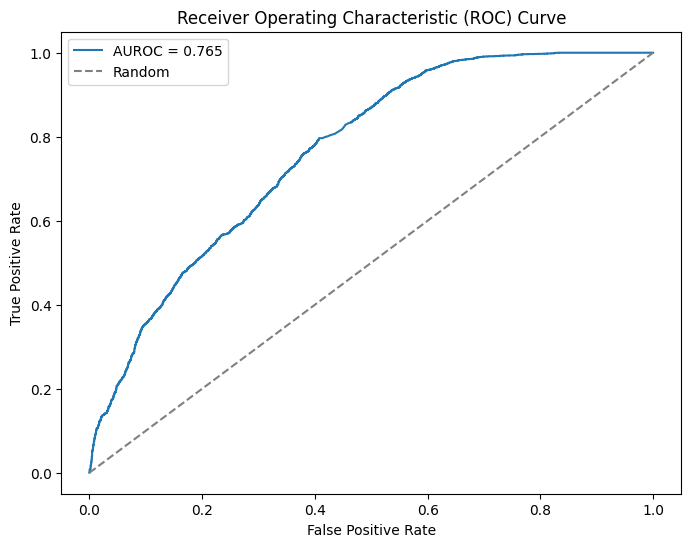

In [ ]:
#deep_cnn=ModelMaker('deep_cnn', 'kce', datasetsplit_list, classweight_list, dataset_list)
deep_cnn=ModelMaker('deep_cnn', 'kc', datasetsplit_list, classweight_list, dataset_list)
#deep_cnn=ModelMaker('deep_cnn', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

deep_cnn.fitlogic()
deep_cnn.predictlogic()

Grid Search Best Weights :  {0: 1.0037126893103956, 1: 0.9963146756184778}
Epoch 1/50
427/427 [==============================] - 4s 6ms/step - loss: 0.6658 - accuracy: 0.5633
Epoch 2/50
427/427 [==============================] - 2s 6ms/step - loss: 0.6514 - accuracy: 0.5915
Epoch 3/50
427/427 [==============================] - 2s 6ms/step - loss: 0.6439 - accuracy: 0.6034
Epoch 4/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6388 - accuracy: 0.6141
Epoch 5/50
427/427 [==============================] - 2s 6ms/step - loss: 0.6328 - accuracy: 0.6200
Epoch 6/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6300 - accuracy: 0.6224
Epoch 7/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6259 - accuracy: 0.6262
Epoch 8/50
427/427 [==============================] - 2s 6ms/step - loss: 0.6245 - accuracy: 0.6257
Epoch 9/50
427/427 [==============================] - 2s 6ms/step - loss: 0.6238 - accuracy: 0.6286
Epoch 10/50
427/427 [====

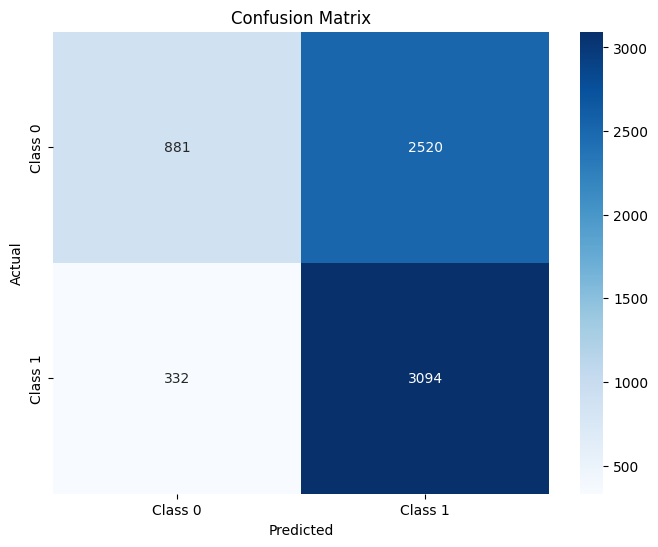

Accuracy: 0.582246960597627
Precision: 0.7262984336356142
Recall(TNR): 0.9030939871570345
F1 Score: 0.6845132743362832
True Positive Rate (TPR): 0.2590414583945898
False Positive Rate (FPR): 0.7409585416054102


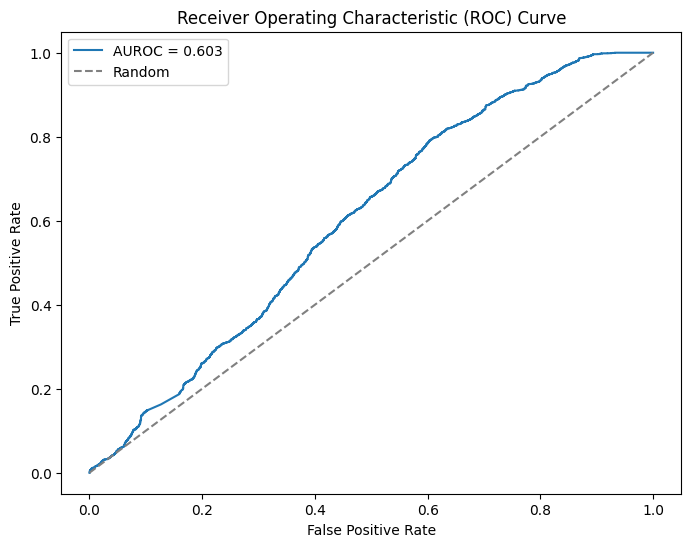

In [ ]:
#deep_cnn=ModelMaker('deep_cnn', 'kce', datasetsplit_list, classweight_list, dataset_list)
#deep_cnn=ModelMaker('deep_cnn', 'kc', datasetsplit_list, classweight_list, dataset_list)
deep_cnn=ModelMaker('deep_cnn', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

deep_cnn.fitlogic()
deep_cnn.predictlogic()

# 8. 새로운 모델 작업 공간

> (1) DevNet
> - Anomaly Scoring Network(이상치 점수 부여 네트워크)가 있습니다. 함수 ϕ를 사용하여 주어진 입력 데이터 x에 각각 scalar 이상 점수를 산출합니다. 그리고, MLP(Multi Layer Perceptron) 기반입니다.
> - Reference Score Generation이 있습니다. 이것은, 모델 학습을 위해 또 다른 scalar 점수를 생성하며, 샘플에 대한 이상치 점수 {r1,r2· · · , ri}의 평균으로 µR을 계산합니다.
> - Deviation Loss입니다. ϕ (x), µR, σR은 최적화를 위해 편차 손실 함수 L에 입력합니다.
> - 논문원본(1) : https://arxiv.org/pdf/1911.08623.pdf
> - 논문리뷰 블로그(1) : https://bigwaveai.tistory.com/6
> - 논문구현 깃허브(1) : https://github.com/GuansongPang/deviation-network

> (2) XGBOD(Extreme Gradient Boosting for Outlier Detection)

In [ ]:
# 개별 모델 셋팅 및 가중치 설정 전용 함수를 따로 py로 제작하였습니다.
%run pyfile/SetModel.py

<Figure size 640x480 with 0 Axes>

Grid Search Best Weights :  {0: 1.0009505008408277, 1: 0.9990513026344596}
Epoch 1/50
428/428 [==============================] - 3s 5ms/step - loss: 1.3754 - accuracy: 0.5233
Epoch 2/50
428/428 [==============================] - 2s 5ms/step - loss: 0.8065 - accuracy: 0.5437
Epoch 3/50
428/428 [==============================] - 2s 5ms/step - loss: 0.7255 - accuracy: 0.5399
Epoch 4/50
428/428 [==============================] - 2s 5ms/step - loss: 0.7043 - accuracy: 0.5347
Epoch 5/50
428/428 [==============================] - 2s 5ms/step - loss: 0.6980 - accuracy: 0.5406
Epoch 6/50
428/428 [==============================] - 2s 4ms/step - loss: 0.6969 - accuracy: 0.5332
Epoch 7/50
428/428 [==============================] - 2s 4ms/step - loss: 0.6956 - accuracy: 0.5347
Epoch 8/50
428/428 [==============================] - 2s 4ms/step - loss: 0.6957 - accuracy: 0.5299
Epoch 9/50
428/428 [==============================] - 2s 4ms/step - loss: 0.6954 - accuracy: 0.5344
Epoch 10/50
428/428 [====

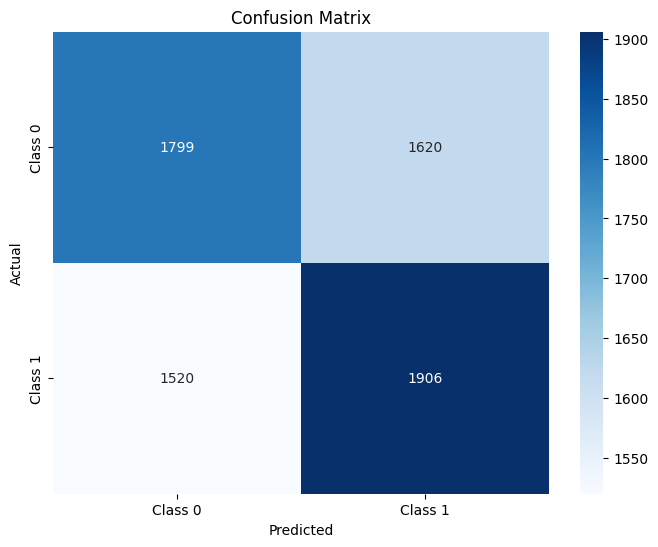

Accuracy: 0.5412710007304602
Precision: 0.5420307321482374
Recall(TNR): 0.5563339171044951
F1 Score: 0.5483314154200231
True Positive Rate (TPR): 0.5261772448084235
False Positive Rate (FPR): 0.47382275519157646


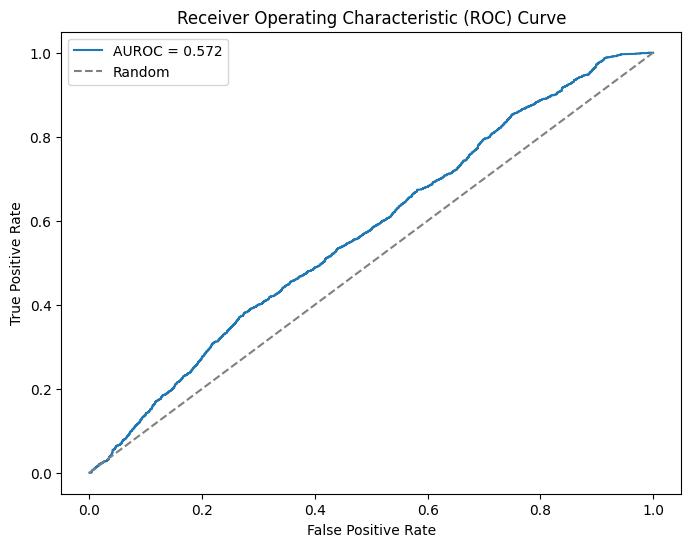

In [ ]:
devnet_kce=ModelMaker('devnet', 'kce', datasetsplit_list, classweight_list, dataset_list)
#devnet_kc=ModelMaker('devnet', 'kc', datasetsplit_list, classweight_list, dataset_list)
#devnet_tfidf=ModelMaker('devnet', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

devnet_kce.fitlogic()
devnet_kce.predictlogic()

Grid Search Best Weights :  {0: 1.0037126893103956, 1: 0.9963146756184778}
Epoch 1/50
427/427 [==============================] - 3s 5ms/step - loss: 1.0802 - accuracy: 0.5154
Epoch 2/50
427/427 [==============================] - 2s 4ms/step - loss: 0.7207 - accuracy: 0.5358
Epoch 3/50
427/427 [==============================] - 2s 5ms/step - loss: 0.7042 - accuracy: 0.5269
Epoch 4/50
427/427 [==============================] - 2s 4ms/step - loss: 0.7001 - accuracy: 0.5190
Epoch 5/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6978 - accuracy: 0.5094
Epoch 6/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6967 - accuracy: 0.4986
Epoch 7/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6957 - accuracy: 0.5039
Epoch 8/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6954 - accuracy: 0.4972
Epoch 9/50
427/427 [==============================] - 2s 5ms/step - loss: 0.6948 - accuracy: 0.5023
Epoch 10/50
427/427 [====

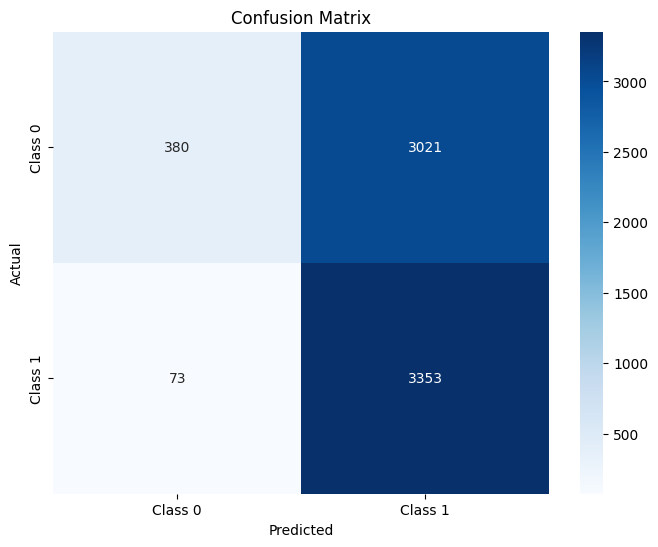

Accuracy: 0.5467994726819979
Precision: 0.8388520971302428
Recall(TNR): 0.9786923525977816
F1 Score: 0.6842857142857143
True Positive Rate (TPR): 0.11173184357541899
False Positive Rate (FPR): 0.888268156424581


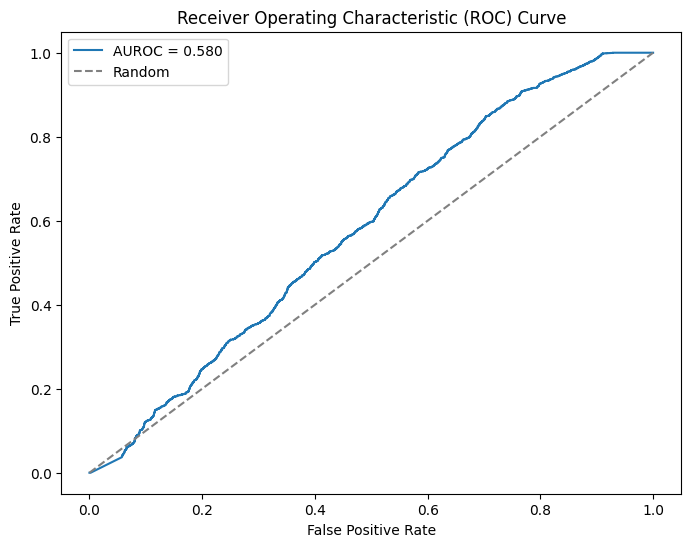

In [ ]:
#devnet_kce=ModelMaker('devnet', 'kce', datasetsplit_list, classweight_list, dataset_list)
devnet_kc=ModelMaker('devnet', 'kc', datasetsplit_list, classweight_list, dataset_list)
#devnet_tfidf=ModelMaker('devnet', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

devnet_kc.fitlogic()
devnet_kc.predictlogic()

Grid Search Best Weights :  {0: 1.0037126893103956, 1: 0.9963146756184778}
Epoch 1/50
427/427 [==============================] - 3s 5ms/step - loss: 1.0747 - accuracy: 0.5265
Epoch 2/50
427/427 [==============================] - 2s 4ms/step - loss: 0.7223 - accuracy: 0.5420
Epoch 3/50
427/427 [==============================] - 2s 4ms/step - loss: 0.7056 - accuracy: 0.5273
Epoch 4/50
427/427 [==============================] - 2s 4ms/step - loss: 0.7014 - accuracy: 0.5217
Epoch 5/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6986 - accuracy: 0.5259
Epoch 6/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6975 - accuracy: 0.5099
Epoch 7/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6964 - accuracy: 0.5058
Epoch 8/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6962 - accuracy: 0.5010
Epoch 9/50
427/427 [==============================] - 2s 4ms/step - loss: 0.6947 - accuracy: 0.5046
Epoch 10/50
427/427 [====

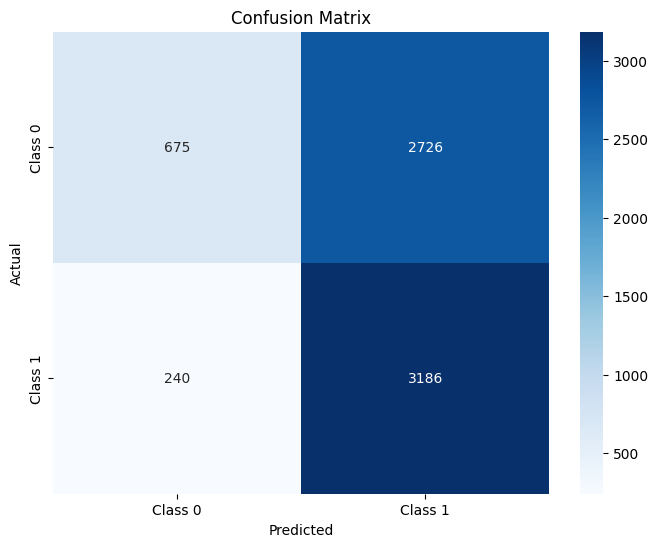

Accuracy: 0.5655485571993555
Precision: 0.7377049180327869
Recall(TNR): 0.9299474605954466
F1 Score: 0.6823730991647035
True Positive Rate (TPR): 0.19847103793002058
False Positive Rate (FPR): 0.8015289620699794


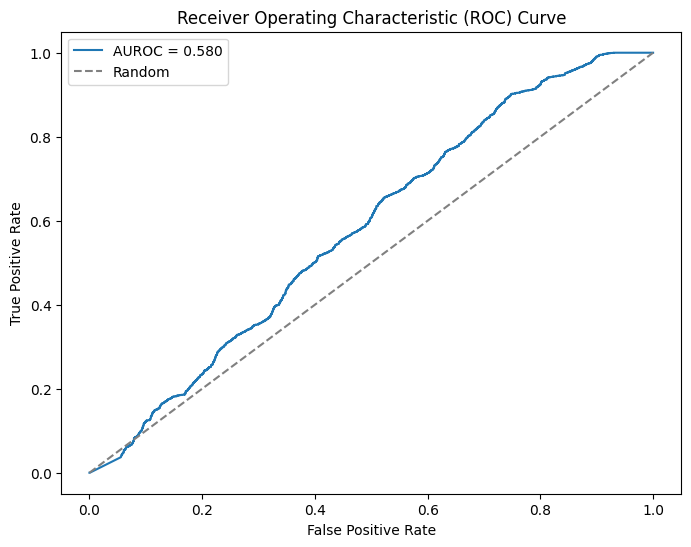

In [ ]:
#devnet_kce=ModelMaker('devnet', 'kce', datasetsplit_list, classweight_list, dataset_list)
#devnet_kc=ModelMaker('devnet', 'kc', datasetsplit_list, classweight_list, dataset_list)
devnet_tfidf=ModelMaker('devnet', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

devnet_tfidf.fitlogic()
devnet_tfidf.predictlogic()

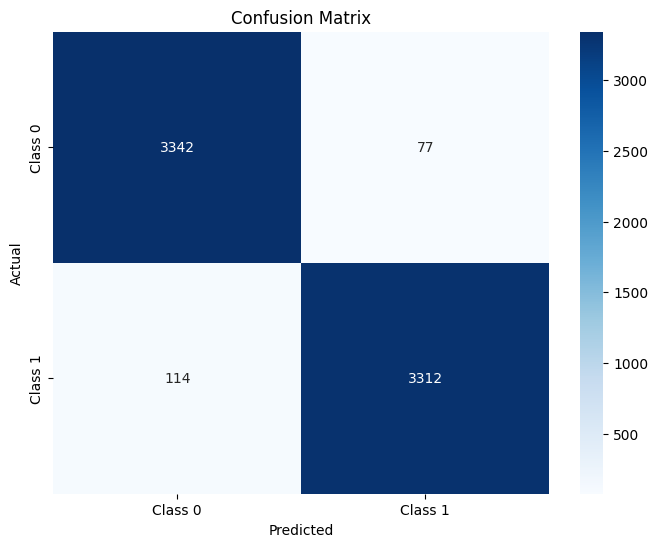

Accuracy: 0.9720964207450694
Precision: 0.9670138888888888
Recall(TNR): 0.9667250437828371
F1 Score: 0.9719735876742479
True Positive Rate (TPR): 0.9774787949692892
False Positive Rate (FPR): 0.022521205030710735


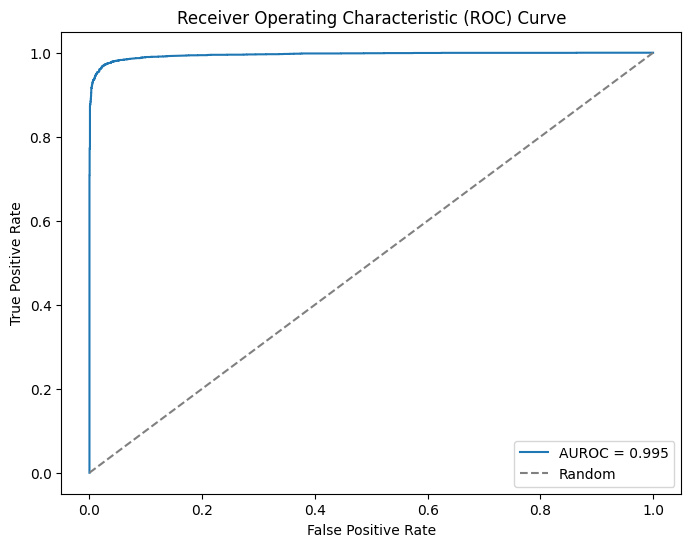

In [ ]:
xgbod_model=ModelMaker('xgbod', 'kce', datasetsplit_list, classweight_list, dataset_list)
#xgbod_model=ModelMaker('xgbod', 'kc', datasetsplit_list, classweight_list, dataset_list)
#xgbod_model=ModelMaker('xgbod', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

xgbod_model.fitlogic()
xgbod_model.predictlogic()

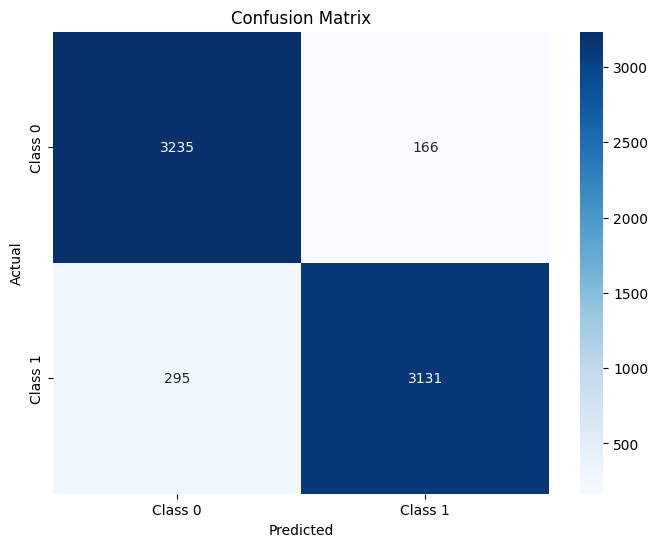

Accuracy: 0.9324740002929545
Precision: 0.9164305949008499
Recall(TNR): 0.9138937536485697
F1 Score: 0.9314294213892607
True Positive Rate (TPR): 0.9511908262275801
False Positive Rate (FPR): 0.048809173772419875


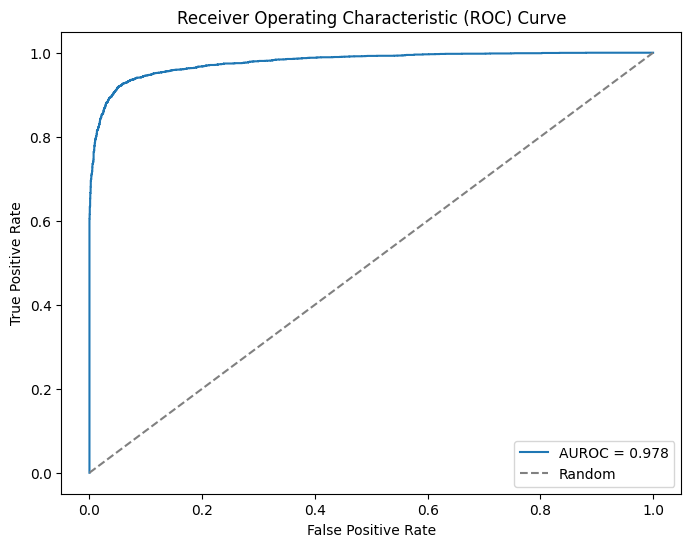

In [ ]:
#xgbod_model=ModelMaker('xgbod', 'kce', datasetsplit_list, classweight_list, dataset_list)
xgbod_model=ModelMaker('xgbod', 'kc', datasetsplit_list, classweight_list, dataset_list)
#xgbod_model=ModelMaker('xgbod', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

xgbod_model.fitlogic()
xgbod_model.predictlogic()

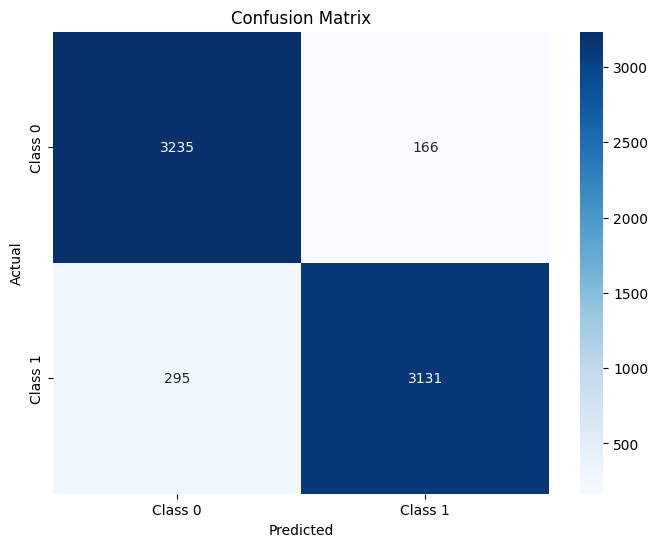

Accuracy: 0.9324740002929545
Precision: 0.9164305949008499
Recall(TNR): 0.9138937536485697
F1 Score: 0.9314294213892607
True Positive Rate (TPR): 0.9511908262275801
False Positive Rate (FPR): 0.048809173772419875


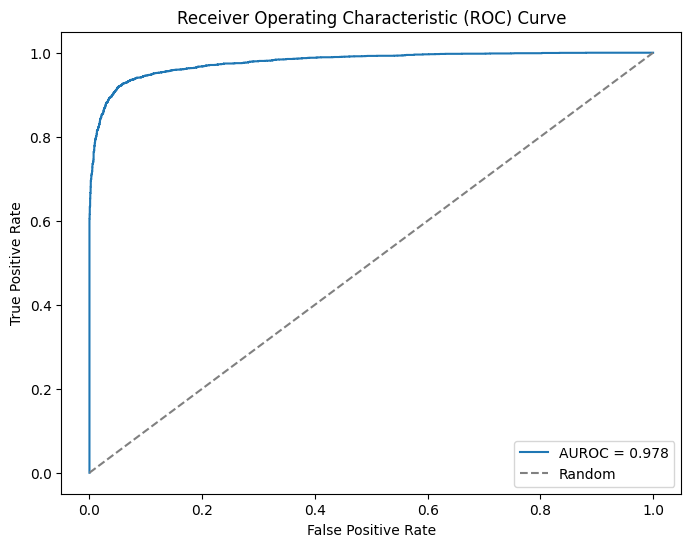

In [ ]:
#xgbod_model=ModelMaker('xgbod', 'kce', datasetsplit_list, classweight_list, dataset_list)
#xgbod_model=ModelMaker('xgbod', 'kc', datasetsplit_list, classweight_list, dataset_list)
xgbod_model=ModelMaker('xgbod', 'tfidf', datasetsplit_list, classweight_list, dataset_list)

xgbod_model.fitlogic()
xgbod_model.predictlogic()

# 9. Ablation study for DevNet

> (1) DevNet
>> (1-1) Change L2 regularizers from 0.01 to 0.005.  
>> (1-2) Change removing Dense in output layer with 32 layers.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from keras.optimizers import Adam

class AblationStudy:
    def __init__(self, types, datasetsplit, classweight_list):
        self.datasetsplit_list = datasetsplit
        self.cw_list = classweight_list
        self.models = None
        self.types=types
        self.X_train=None
        self.X_test=None
        self.y_train=None
        self.y_test=None

    def getXY(self):
        self.datasetsplit_list=Utility(self.types, self.datasetsplit_list).getXY()
        self.X_train, self.X_test, self.y_train, self.y_test = self.datasetsplit_list[0], self.datasetsplit_list[1], self.datasetsplit_list[2], self.datasetsplit_list[3]

    def getWeights(self, weights_in, model):
        if weights_in:
            if self.types == 'kce':
                return self.cw_list[0]
            elif self.types == 'kce':
                return self.cw_list[1]
            else:
                return self.cw_list[2]

    def train_model(self, optimizer, epochs=50, batch_size=64):
        self.models.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        weights=dict(enumerate(self.getWeights(True, None)))
        self.models.fit(self.X_train, self.y_train, epochs=epochs, class_weight=weights, batch_size=batch_size, verbose=1)

    def evaluate_model(self, model):
        y_pred = model.predict(self.X_test)

        # 평균 계산
        average_value = np.mean(y_pred)

        # Check if the most frequent value is greater than 0.5
        mode_value, _ = mode(y_pred.flatten())
        min_value = min(y_pred.flatten())
        max_value = max(y_pred.flatten())
        if min_value > 0:
            if max_value >= 0.5:
                average_value = 0.5

        y_pred_binary = (y_pred > average_value).astype(int)

        # Ensure that y_test and y_pred_binary have the same shape
        if self.y_test.shape != y_pred_binary.shape:
            # Assuming y_test is a 2D array, convert it to a 1D array
            self.y_test = self.y_test.ravel()

        # 혼동 행렬 출력
        cm = confusion_matrix(self.y_test, y_pred_binary)  # 테스트 세트에 대한 혼동 행렬 생성
        # 혼동 행렬을 히트맵으로 시각화
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Additional evaluation metrics
        accuracy = accuracy_score(self.y_test, y_pred_binary)
        precision = cm[0, 0] / (cm[0, 0] + cm[1, 0])
        recall = recall_score(self.y_test, y_pred_binary)
        f1 = f1_score(self.y_test, y_pred_binary)
        tpr = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # True Negative Rate
        fpr = cm[0, 1] / (cm[0, 0] + cm[0, 1])  # False Positive Rate

        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall(TNR):", recall)
        print("F1 Score:", f1)
        print("True Positive Rate (TPR):", tpr)
        print("False Positive Rate (FPR):", fpr)

        # Compute AUROC
        auroc = roc_auc_score(self.y_test, y_pred)

        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(self.y_test, y_pred)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label='AUROC = {:.3f}'.format(auroc))
        plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

    def run_ablation_study1(self):
        # ablation part 1 : change regularizer
        x_input = Input(shape=(self.X_train.shape[1],))
        intermediate = Dense(128, activation='relu',
                    kernel_regularizer=regularizers.l2(0.005), name = 'hl1')(x_input)
        intermediate = Dense(64, activation='relu',
                    kernel_regularizer=regularizers.l2(0.005), name = 'hl2')(intermediate)
        intermediate = Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l2(0.005), name = 'hl3')(intermediate)
        intermediate = Dense(1, activation='linear', name = 'score')(intermediate)
        model_without_hl1 = Model(x_input, intermediate)
        self.models = model_without_hl1
        self.train_model(optimizer=Adam())
        self.evaluate_model(self.models)

    def run_ablation_study2(self):
        # ablation part 2 : remove dense one level
        x_input = Input(shape=(self.X_train.shape[1],))
        intermediate = Dense(128, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01), name = 'hl1')(x_input)
        intermediate = Dense(64, activation='relu',
                    kernel_regularizer=regularizers.l2(0.01), name = 'hl2')(intermediate)
        intermediate = Dense(1, activation='linear', name = 'score')(intermediate)
        model_without_hl1 = Model(x_input, intermediate)
        self.models = model_without_hl1
        self.train_model(optimizer=Adam())
        self.evaluate_model(self.models)


Epoch 1/50
428/428 [==============================] - 2s 3ms/step - loss: 1.1123 - accuracy: 0.5342
Epoch 2/50
428/428 [==============================] - 1s 3ms/step - loss: 0.8260 - accuracy: 0.5659
Epoch 3/50
428/428 [==============================] - 1s 3ms/step - loss: 0.7511 - accuracy: 0.5749
Epoch 4/50
428/428 [==============================] - 1s 3ms/step - loss: 0.7184 - accuracy: 0.5731
Epoch 5/50
428/428 [==============================] - 1s 3ms/step - loss: 0.7010 - accuracy: 0.5789
Epoch 6/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6921 - accuracy: 0.5844
Epoch 7/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6872 - accuracy: 0.5920
Epoch 8/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6841 - accuracy: 0.5970
Epoch 9/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6802 - accuracy: 0.6043
Epoch 10/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6784 - accuracy: 0.6113

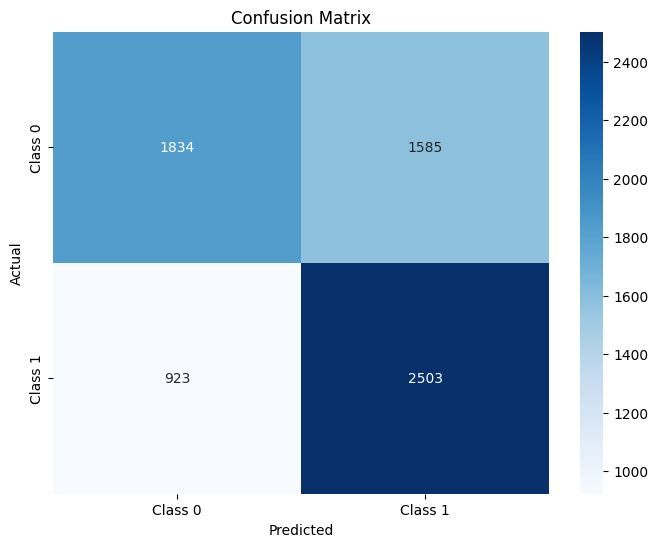

Accuracy: 0.6336011687363039
Precision: 0.6652158142908959
Recall(TNR): 0.7305896088733217
F1 Score: 0.6662230503060954
True Positive Rate (TPR): 0.5364141561860193
False Positive Rate (FPR): 0.4635858438139807


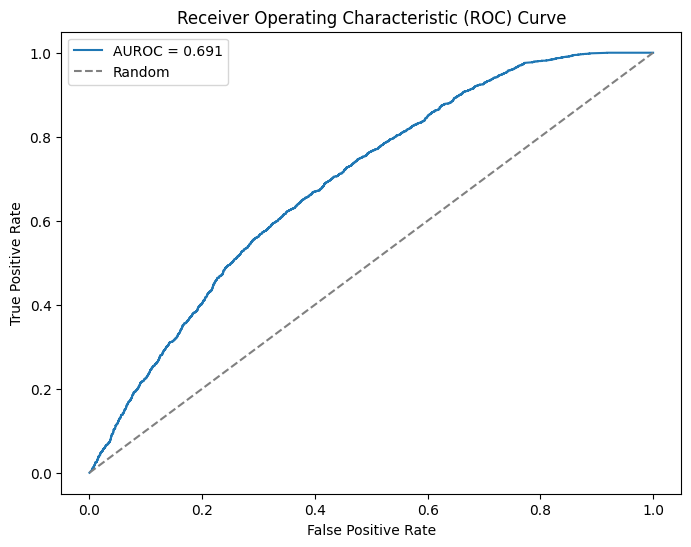

In [ ]:
# Create an instance of the AblationStudy class

ablation_study = AblationStudy(types='kce',datasetsplit=datasetsplit_list, classweight_list=classweight_list)
#ablation_study = AblationStudy(types='kc', datasetsplit=datasetsplit_list, classweight_list=classweight_list)
#ablation_study = AblationStudy(types='tfidf', datasetsplit=datasetsplit_list, classweight_list=classweight_list)

ablation_study.getXY()

# Run the ablation study
ablation_study.run_ablation_study1()


Epoch 1/50
427/427 [==============================] - 2s 3ms/step - loss: 0.9582 - accuracy: 0.5375
Epoch 2/50
427/427 [==============================] - 1s 3ms/step - loss: 0.7125 - accuracy: 0.5639
Epoch 3/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.5632
Epoch 4/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6889 - accuracy: 0.5622
Epoch 5/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6864 - accuracy: 0.5617
Epoch 6/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6855 - accuracy: 0.5620
Epoch 7/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.5634
Epoch 8/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6828 - accuracy: 0.5631
Epoch 9/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6821 - accuracy: 0.5596
Epoch 10/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6808 - accuracy: 0.5666

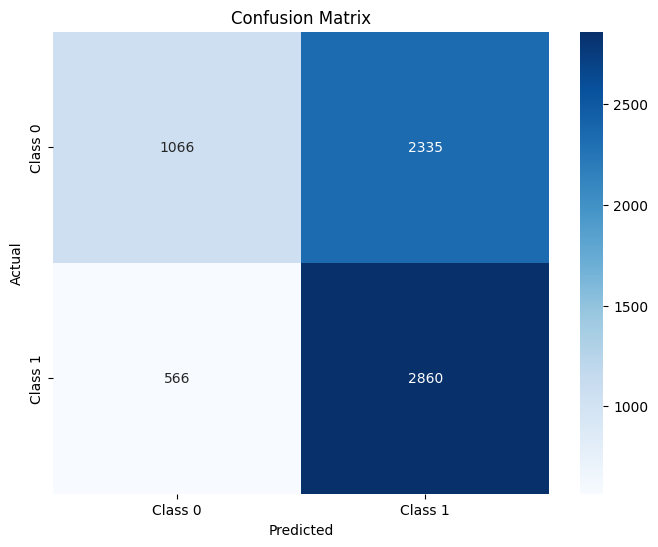

Accuracy: 0.5750695766808261
Precision: 0.6531862745098039
Recall(TNR): 0.8347927612375948
F1 Score: 0.663496114139891
True Positive Rate (TPR): 0.31343722434578064
False Positive Rate (FPR): 0.6865627756542193


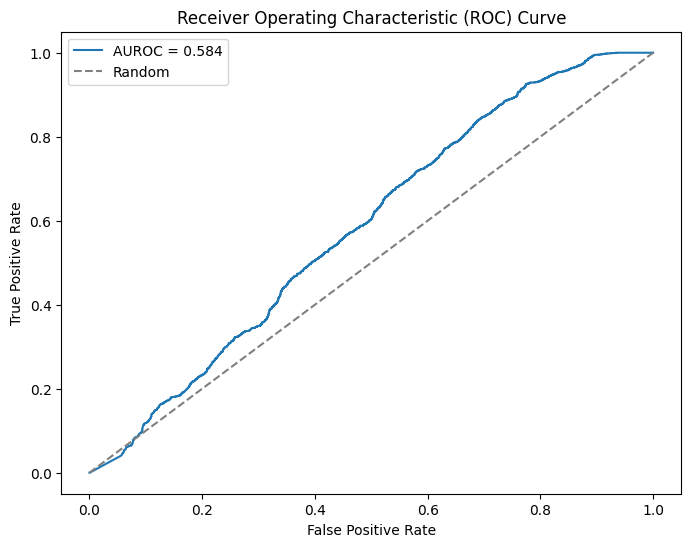

In [ ]:
# Create an instance of the AblationStudy class

#ablation_study = AblationStudy(types='kce',datasetsplit=datasetsplit_list, classweight_list=classweight_list)
ablation_study = AblationStudy(types='kc', datasetsplit=datasetsplit_list, classweight_list=classweight_list)
#ablation_study = AblationStudy(types='tfidf', datasetsplit=datasetsplit_list, classweight_list=classweight_list)

ablation_study.getXY()

# Run the ablation study
ablation_study.run_ablation_study1()


Epoch 1/50
427/427 [==============================] - 2s 3ms/step - loss: 0.9718 - accuracy: 0.5362
Epoch 2/50
427/427 [==============================] - 1s 3ms/step - loss: 0.7256 - accuracy: 0.5629
Epoch 3/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6995 - accuracy: 0.5610
Epoch 4/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6909 - accuracy: 0.5615
Epoch 5/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6867 - accuracy: 0.5629
Epoch 6/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6855 - accuracy: 0.5634
Epoch 7/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6835 - accuracy: 0.5637
Epoch 8/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6826 - accuracy: 0.5613
Epoch 9/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6817 - accuracy: 0.5617
Epoch 10/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6804 - accuracy: 0.5645

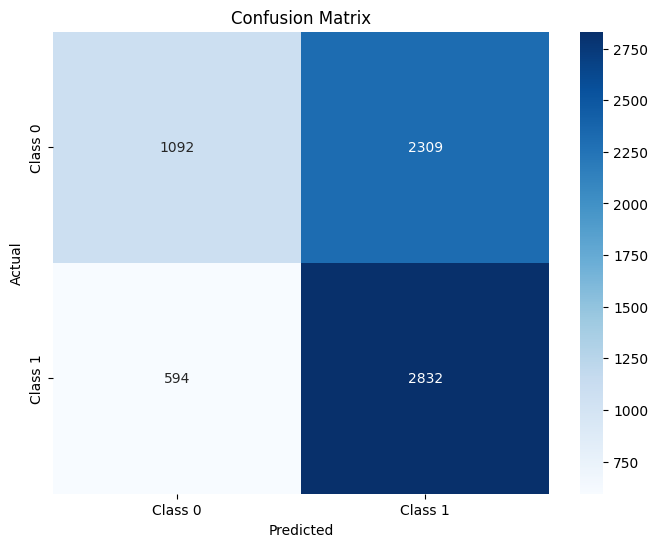

Accuracy: 0.5747766222352424
Precision: 0.6476868327402135
Recall(TNR): 0.8266199649737302
F1 Score: 0.6611415898214077
True Positive Rate (TPR): 0.32108203469567775
False Positive Rate (FPR): 0.6789179653043222


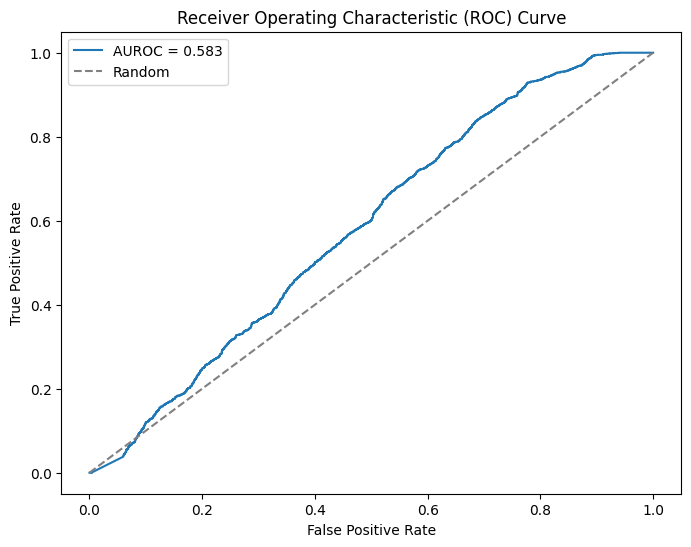

In [ ]:
# Create an instance of the AblationStudy class

#ablation_study = AblationStudy(types='kce',datasetsplit=datasetsplit_list, classweight_list=classweight_list)
#ablation_study = AblationStudy(types='kc', datasetsplit=datasetsplit_list, classweight_list=classweight_list)
ablation_study = AblationStudy(types='tfidf', datasetsplit=datasetsplit_list, classweight_list=classweight_list)

ablation_study.getXY()

# Run the ablation study
ablation_study.run_ablation_study1()


Epoch 1/50
428/428 [==============================] - 2s 3ms/step - loss: 0.9719 - accuracy: 0.5324
Epoch 2/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6980 - accuracy: 0.5424
Epoch 3/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6897 - accuracy: 0.5467
Epoch 4/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6888 - accuracy: 0.5449
Epoch 5/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6882 - accuracy: 0.5396
Epoch 6/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6881 - accuracy: 0.5455
Epoch 7/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6879 - accuracy: 0.5452
Epoch 8/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6874 - accuracy: 0.5462
Epoch 9/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6868 - accuracy: 0.5496
Epoch 10/50
428/428 [==============================] - 1s 3ms/step - loss: 0.6859 - accuracy: 0.5475

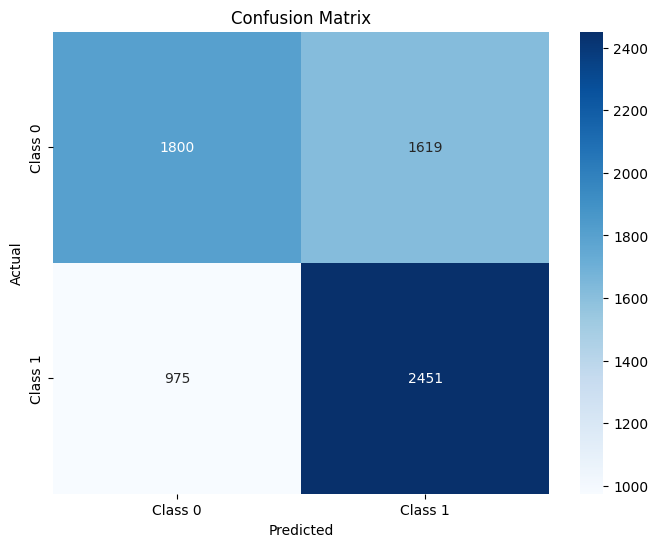

Accuracy: 0.6210372534696859
Precision: 0.6486486486486487
Recall(TNR): 0.7154115586690017
F1 Score: 0.6539487726787621
True Positive Rate (TPR): 0.5264697279906405
False Positive Rate (FPR): 0.4735302720093595


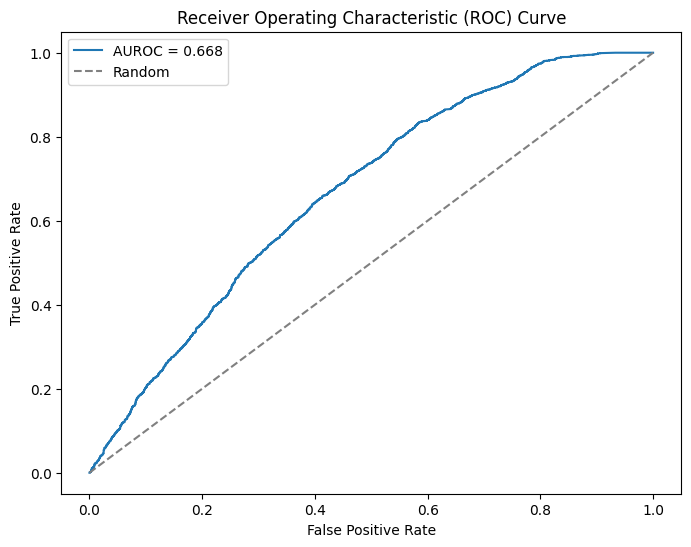

In [ ]:
# Create an instance of the AblationStudy class

ablation_study = AblationStudy(types='kce',datasetsplit=datasetsplit_list, classweight_list=classweight_list)
#ablation_study = AblationStudy(types='kc', datasetsplit=datasetsplit_list, classweight_list=classweight_list)
#ablation_study = AblationStudy(types='tfidf', datasetsplit=datasetsplit_list, classweight_list=classweight_list)

ablation_study.getXY()

# Run the ablation study
ablation_study.run_ablation_study2()


Epoch 1/50
427/427 [==============================] - 2s 3ms/step - loss: 0.9527 - accuracy: 0.5173
Epoch 2/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6984 - accuracy: 0.5402
Epoch 3/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6940 - accuracy: 0.5391
Epoch 4/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.5474
Epoch 5/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6911 - accuracy: 0.5454
Epoch 6/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.5554
Epoch 7/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6867 - accuracy: 0.5583
Epoch 8/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6854 - accuracy: 0.5588
Epoch 9/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6845 - accuracy: 0.5556
Epoch 10/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6823 - accuracy: 0.5624

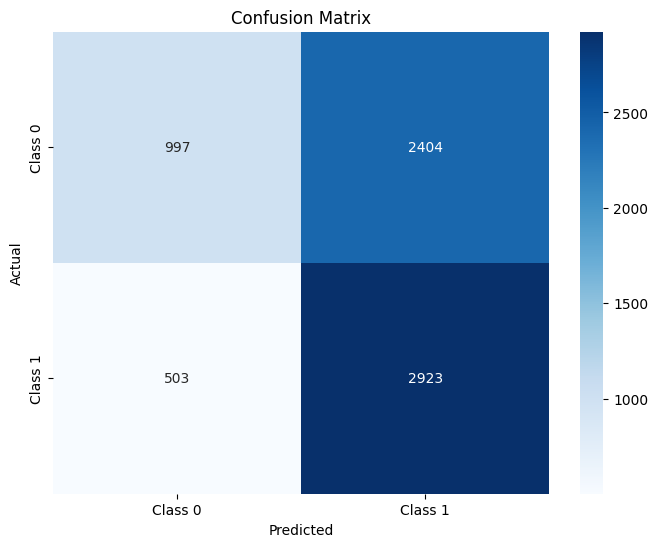

Accuracy: 0.574190713344075
Precision: 0.6646666666666666
Recall(TNR): 0.8531815528312902
F1 Score: 0.6678852964697817
True Positive Rate (TPR): 0.293149073801823
False Positive Rate (FPR): 0.706850926198177


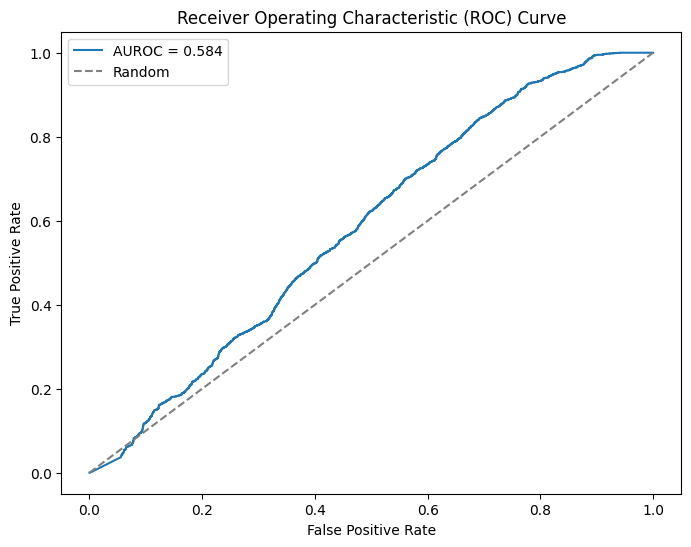

In [ ]:
# Create an instance of the AblationStudy class

#ablation_study = AblationStudy(types='kce',datasetsplit=datasetsplit_list, classweight_list=classweight_list)
ablation_study = AblationStudy(types='kc', datasetsplit=datasetsplit_list, classweight_list=classweight_list)
#ablation_study = AblationStudy(types='tfidf', datasetsplit=datasetsplit_list, classweight_list=classweight_list)

ablation_study.getXY()

# Run the ablation study
ablation_study.run_ablation_study2()


Epoch 1/50
427/427 [==============================] - 2s 3ms/step - loss: 1.1215 - accuracy: 0.5176
Epoch 2/50
427/427 [==============================] - 1s 3ms/step - loss: 0.7750 - accuracy: 0.5536
Epoch 3/50
427/427 [==============================] - 1s 3ms/step - loss: 0.7171 - accuracy: 0.5480
Epoch 4/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6974 - accuracy: 0.5503
Epoch 5/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6912 - accuracy: 0.5547
Epoch 6/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6867 - accuracy: 0.5568
Epoch 7/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.5621
Epoch 8/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6824 - accuracy: 0.5599
Epoch 9/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6816 - accuracy: 0.5573
Epoch 10/50
427/427 [==============================] - 1s 3ms/step - loss: 0.6807 - accuracy: 0.5604

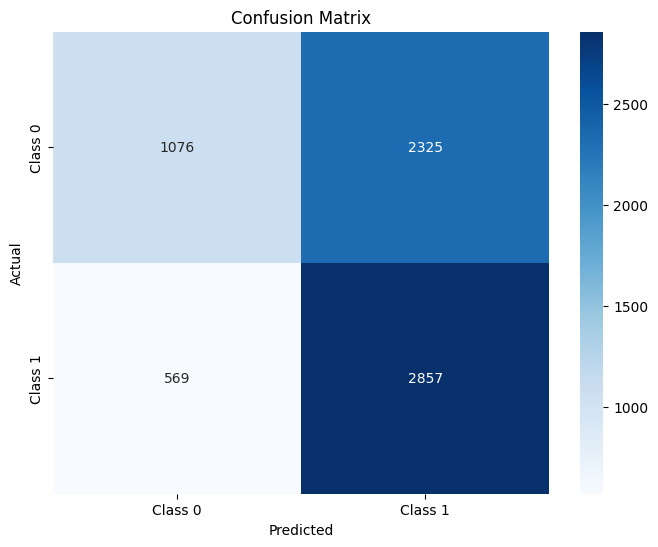

Accuracy: 0.5760949172403691
Precision: 0.6541033434650456
Recall(TNR): 0.833917104495038
F1 Score: 0.6638011152416357
True Positive Rate (TPR): 0.316377536018818
False Positive Rate (FPR): 0.683622463981182


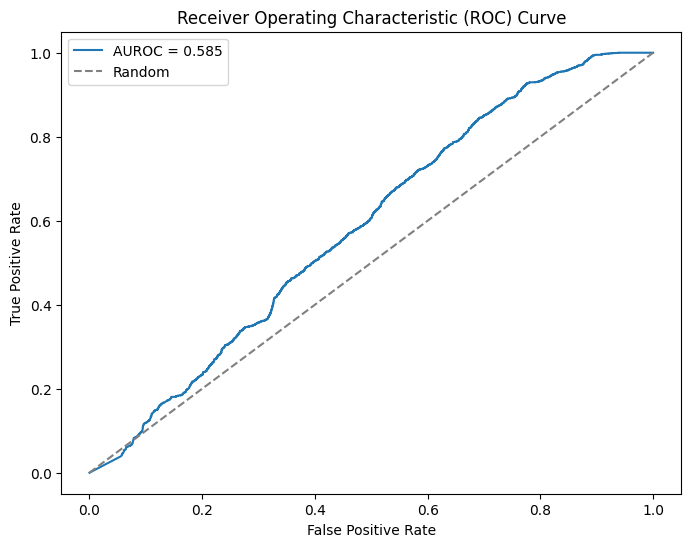

In [ ]:
# Create an instance of the AblationStudy class

#ablation_study = AblationStudy(types='kce',datasetsplit=datasetsplit_list, classweight_list=classweight_list)
#ablation_study = AblationStudy(types='kc', datasetsplit=datasetsplit_list, classweight_list=classweight_list)
ablation_study = AblationStudy(types='tfidf', datasetsplit=datasetsplit_list, classweight_list=classweight_list)

ablation_study.getXY()

# Run the ablation study
ablation_study.run_ablation_study2()
